<h2> DATA COLLECTION <h2>

In [66]:
!pip install stats
import pandas as pd
import numpy as np
import stats

df =  pd.read_csv('dataset_project_eHealth20242025.csv')
df.head()

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,ssba_drug_3,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4
0,18,2.0,13,0.0,38000.0,0.0,1,3,0,0,...,1,1,2,0,0,0.0,1.0,1.0,0.0,0.0
1,62,1.0,5,1.0,22000.0,0.0,2,2,2,2,...,0,0,4,1,3,4.0,0.0,4.0,0.0,2.0
2,31,1.0,13,0.0,33000.0,3.0,1,3,0,3,...,4,4,1,1,0,1.0,1.0,0.0,2.0,0.0
3,76,3.0,8,4.0,10000.0,2.0,3,2,2,2,...,1,2,3,2,3,4.0,2.0,2.0,4.0,1.0
4,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 93 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              160 non-null    int64  
 1   gender           158 non-null    float64
 2   education        160 non-null    int64  
 3   marital          159 non-null    float64
 4   income           159 non-null    float64
 5   phq_1            159 non-null    float64
 6   phq_2            160 non-null    int64  
 7   phq_3            160 non-null    int64  
 8   phq_4            160 non-null    int64  
 9   phq_5            160 non-null    int64  
 10  phq_6            158 non-null    float64
 11  phq_7            160 non-null    int64  
 12  phq_8            160 non-null    int64  
 13  phq_9            159 non-null    float64
 14  gad_1            160 non-null    int64  
 15  gad_2            160 non-null    int64  
 16  gad_3            160 non-null    int64  
 17  gad_4           

In [68]:
df.shape[0] # number of rows

160

In [69]:
df.shape[1] # number of columns

93

Initially, the dataset has 160 rows and 93 columns.

<h2> DATA CLEANING <h2>

<h3> Processing rows <h3>

I want to cancel the rows that have null values in the columns important for me.

I decide to create a new dataset called df_new.

In [70]:
df_new = df.copy()

I cancel the rows that have at least one null value (NaN) in the columns from phq_1 to phq_9 because the final score of the questionnaire would be uncompleted.

In [71]:
df_new = df_new.dropna(subset=[f'phq_{i}' for i in range(1, 10)])

df_new

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,ssba_drug_3,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4
0,18,2.0,13,0.0,38000.0,0.0,1,3,0,0,...,1,1,2,0,0,0.0,1.0,1.0,0.0,0.0
1,62,1.0,5,1.0,22000.0,0.0,2,2,2,2,...,0,0,4,1,3,4.0,0.0,4.0,0.0,2.0
2,31,1.0,13,0.0,33000.0,3.0,1,3,0,3,...,4,4,1,1,0,1.0,1.0,0.0,2.0,0.0
3,76,3.0,8,4.0,10000.0,2.0,3,2,2,2,...,1,2,3,2,3,4.0,2.0,2.0,4.0,1.0
4,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,80,2.0,18,3.0,18000.0,1.0,2,1,3,3,...,0,1,4,2,0,1.0,3.0,3.0,0.0,4.0
156,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0
157,26,3.0,18,0.0,39000.0,2.0,2,3,3,0,...,3,4,0,0,2,0.0,0.0,0.0,0.0,2.0
158,46,1.0,22,1.0,57000.0,0.0,0,1,0,0,...,0,1,0,1,0,0.0,0.0,0.0,1.0,0.0


I cancel the rows that have at least one null value in the columns from gad_1_1 to gad_7
because the final score of the questionnaire would be uncompleted.

In [72]:
df_new = df_new.dropna(subset=[f'gad_{i}' for i in range(1, 8)])

df_new

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,ssba_drug_3,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4
0,18,2.0,13,0.0,38000.0,0.0,1,3,0,0,...,1,1,2,0,0,0.0,1.0,1.0,0.0,0.0
1,62,1.0,5,1.0,22000.0,0.0,2,2,2,2,...,0,0,4,1,3,4.0,0.0,4.0,0.0,2.0
2,31,1.0,13,0.0,33000.0,3.0,1,3,0,3,...,4,4,1,1,0,1.0,1.0,0.0,2.0,0.0
3,76,3.0,8,4.0,10000.0,2.0,3,2,2,2,...,1,2,3,2,3,4.0,2.0,2.0,4.0,1.0
4,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,80,2.0,18,3.0,18000.0,1.0,2,1,3,3,...,0,1,4,2,0,1.0,3.0,3.0,0.0,4.0
156,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0
157,26,3.0,18,0.0,39000.0,2.0,2,3,3,0,...,3,4,0,0,2,0.0,0.0,0.0,0.0,2.0
158,46,1.0,22,1.0,57000.0,0.0,0,1,0,0,...,0,1,0,1,0,0.0,0.0,0.0,1.0,0.0


I cancel the rows that have at least one null value in the columns from all ssba_1 to ssba_4 because the final score of the questionnaire would be uncompleted

In [73]:
df_new = df_new.dropna(subset=[f'ssba_internet_{i}' for i in range(1, 5)])
df_new = df_new.dropna(subset=[f'ssba_drug_{i}' for i in range(1, 5)])
df_new = df_new.dropna(subset=[f'ssba_alcohol_{i}' for i in range(1, 5)])
df_new = df_new.dropna(subset=[f'ssba_gambling_{i}' for i in range(1, 5)])
df_new

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,ssba_drug_3,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4
0,18,2.0,13,0.0,38000.0,0.0,1,3,0,0,...,1,1,2,0,0,0.0,1.0,1.0,0.0,0.0
1,62,1.0,5,1.0,22000.0,0.0,2,2,2,2,...,0,0,4,1,3,4.0,0.0,4.0,0.0,2.0
2,31,1.0,13,0.0,33000.0,3.0,1,3,0,3,...,4,4,1,1,0,1.0,1.0,0.0,2.0,0.0
3,76,3.0,8,4.0,10000.0,2.0,3,2,2,2,...,1,2,3,2,3,4.0,2.0,2.0,4.0,1.0
4,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,80,2.0,18,3.0,18000.0,1.0,2,1,3,3,...,0,1,4,2,0,1.0,3.0,3.0,0.0,4.0
156,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0
157,26,3.0,18,0.0,39000.0,2.0,2,3,3,0,...,3,4,0,0,2,0.0,0.0,0.0,0.0,2.0
158,46,1.0,22,1.0,57000.0,0.0,0,1,0,0,...,0,1,0,1,0,0.0,0.0,0.0,1.0,0.0


<h4> I have obtained a new dataset (df_new) with 147 rows and 93 columns. <h4>

<h3> Processing columns <h3>

Concerning depression, I want to discover the total score of the questionnaire.
So, I want to sum up, for each Persona, the score of the columns from phq_1 to phq_9, and later I cancel the columns from phq_1 to phq_9.

In [74]:
df_new['phq_tot'] = df_new.loc[:, 'phq_1':'phq_9'].sum(axis=1)

df_new = df_new.drop(columns=[f'phq_{i}' for i in range(1, 10)])

df_new.head()

,age,gender,education,marital,income,gad_1,gad_2,gad_3,gad_4,gad_5,...,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4,phq_tot
0,18,2.0,13,0.0,38000.0,0,0,3,1,3.0,...,1,2,0,0,0.0,1.0,1.0,0.0,0.0,13.0
1,62,1.0,5,1.0,22000.0,0,0,0,0,0.0,...,0,4,1,3,4.0,0.0,4.0,0.0,2.0,16.0
2,31,1.0,13,0.0,33000.0,3,1,3,3,3.0,...,4,1,1,0,1.0,1.0,0.0,2.0,0.0,19.0
3,76,3.0,8,4.0,10000.0,0,0,0,0,1.0,...,2,3,2,3,4.0,2.0,2.0,4.0,1.0,18.0
4,19,2.0,8,0.0,30000.0,3,3,0,3,3.0,...,0,0,0,0,1.0,1.0,0.0,0.0,2.0,11.0


Concerning anxiety, I want to discover the total score of the questionnaire.
So, I want to sum up, for each Persona, the score of the columns from gad_1 to gad_7, and later I cancel the columns from gad_1 to gad_7.

In [75]:
df_new['gad_tot'] = df_new.loc[:, 'gad_1':'gad_7'].sum(axis=1)

df_new = df_new.drop(columns=[f'gad_{i}' for i in range(1, 8)])

df_new.head()

,age,gender,education,marital,income,asrs_1,asrs_2,asrs_3,asrs_4,asrs_5,...,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4,phq_tot,gad_tot
0,18,2.0,13,0.0,38000.0,1,1,2.0,0,1,...,2,0,0,0.0,1.0,1.0,0.0,0.0,13.0,11.0
1,62,1.0,5,1.0,22000.0,3,3,0.0,1,1,...,4,1,3,4.0,0.0,4.0,0.0,2.0,16.0,0.0
2,31,1.0,13,0.0,33000.0,0,0,2.0,0,2,...,1,1,0,1.0,1.0,0.0,2.0,0.0,19.0,19.0
3,76,3.0,8,4.0,10000.0,2,2,1.0,2,0,...,3,2,3,4.0,2.0,2.0,4.0,1.0,18.0,1.0
4,19,2.0,8,0.0,30000.0,0,2,0.0,0,1,...,0,0,0,1.0,1.0,0.0,0.0,2.0,11.0,16.0


I don't want to concentrate about people with ADHD or ASD, so I decide to remove the columns from asrs_1 to asrs_6 and columns from asq_1 to asq_50.

In [76]:
df_new = df_new.drop(columns=[f'asrs_{i}' for i in range(1, 7)])
df_new = df_new.drop(columns=[f'asq_{i}' for i in range(1, 51)])

df_new.head()

,age,gender,education,marital,income,ssba_internet_1,ssba_internet_2,ssba_internet_3,ssba_internet_4,ssba_drug_1,...,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4,phq_tot,gad_tot
0,18,2.0,13,0.0,38000.0,4,3,4,4.0,0.0,...,2,0,0,0.0,1.0,1.0,0.0,0.0,13.0,11.0
1,62,1.0,5,1.0,22000.0,1,2,0,0.0,0.0,...,4,1,3,4.0,0.0,4.0,0.0,2.0,16.0,0.0
2,31,1.0,13,0.0,33000.0,3,0,2,0.0,4.0,...,1,1,0,1.0,1.0,0.0,2.0,0.0,19.0,19.0
3,76,3.0,8,4.0,10000.0,0,1,0,0.0,0.0,...,3,2,3,4.0,2.0,2.0,4.0,1.0,18.0,1.0
4,19,2.0,8,0.0,30000.0,3,4,4,4.0,4.0,...,0,0,0,1.0,1.0,0.0,0.0,2.0,11.0,16.0


Now, I want to concentrate on addictions:

In [77]:
# I sum up the columns of internet addiction
df_new['ssba_internet_tot'] = df_new.loc[:, 'ssba_internet_1':'ssba_internet_4'].sum(axis=1)

df_new = df_new.drop(columns=[f'ssba_internet_{i}' for i in range(1, 5)])

df_new.head()

,age,gender,education,marital,income,ssba_drug_1,ssba_drug_2,ssba_drug_3,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4,phq_tot,gad_tot,ssba_internet_tot
0,18,2.0,13,0.0,38000.0,0.0,2,1,1,2,0,0,0.0,1.0,1.0,0.0,0.0,13.0,11.0,15.0
1,62,1.0,5,1.0,22000.0,0.0,0,0,0,4,1,3,4.0,0.0,4.0,0.0,2.0,16.0,0.0,3.0
2,31,1.0,13,0.0,33000.0,4.0,3,4,4,1,1,0,1.0,1.0,0.0,2.0,0.0,19.0,19.0,5.0
3,76,3.0,8,4.0,10000.0,0.0,0,1,2,3,2,3,4.0,2.0,2.0,4.0,1.0,18.0,1.0,1.0
4,19,2.0,8,0.0,30000.0,4.0,0,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0,11.0,16.0,15.0


In [78]:
# I sum up the columns of drug addiction
df_new['ssba_drug_tot'] = df_new.loc[:, 'ssba_drug_1':'ssba_drug_4'].sum(axis=1)

df_new = df_new.drop(columns=[f'ssba_drug_{i}' for i in range(1, 5)])

In [79]:
# I sum up the columns of alcohol addiction
df_new['ssba_alcohol_tot'] = df_new.loc[:, 'ssba_alcohol_1':'ssba_alcohol_4'].sum(axis=1)

df_new = df_new.drop(columns=[f'ssba_alcohol_{i}' for i in range(1, 5)])

In [80]:
# I sum up the columns of gambling addiction
df_new['ssba_gambling_tot'] = df_new.loc[:, 'ssba_gambling_1':'ssba_gambling_4'].sum(axis=1)

df_new = df_new.drop(columns=[f'ssba_gambling_{i}' for i in range(1, 5)])

df_new.head()

,age,gender,education,marital,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot
0,18,2.0,13,0.0,38000.0,13.0,11.0,15.0,4.0,2.0,2.0
1,62,1.0,5,1.0,22000.0,16.0,0.0,3.0,0.0,12.0,6.0
2,31,1.0,13,0.0,33000.0,19.0,19.0,5.0,15.0,3.0,3.0
3,76,3.0,8,4.0,10000.0,18.0,1.0,1.0,3.0,12.0,9.0
4,19,2.0,8,0.0,30000.0,11.0,16.0,15.0,8.0,1.0,3.0


In [81]:
df_new

,age,gender,education,marital,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot
0,18,2.0,13,0.0,38000.0,13.0,11.0,15.0,4.0,2.0,2.0
1,62,1.0,5,1.0,22000.0,16.0,0.0,3.0,0.0,12.0,6.0
2,31,1.0,13,0.0,33000.0,19.0,19.0,5.0,15.0,3.0,3.0
3,76,3.0,8,4.0,10000.0,18.0,1.0,1.0,3.0,12.0,9.0
4,19,2.0,8,0.0,30000.0,11.0,16.0,15.0,8.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
155,80,2.0,18,3.0,18000.0,16.0,0.0,1.0,2.0,7.0,10.0
156,19,2.0,8,0.0,30000.0,11.0,16.0,15.0,8.0,1.0,3.0
157,26,3.0,18,0.0,39000.0,16.0,17.0,11.0,10.0,2.0,2.0
158,46,1.0,22,1.0,57000.0,2.0,1.0,2.0,2.0,1.0,1.0


<h4> I have obtained a new dataset (df_new) with 147 rows and 11 columns. <h4>

<h2>EXPLORATORY DATA ANALYSIS<h2>

<h3> Univariate Data Analysis <h3>

In [82]:
df_new.describe()

,age,gender,education,marital,income,phq_tot,gad_tot,ssba_internet_tot,ssba_drug_tot,ssba_alcohol_tot,ssba_gambling_tot
count,147.000000,145.000000,147.000000,146.000000,146.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,46.537415,1.406897,13.523810,1.568493,36053.417808,10.700680,6.857143,4.530612,4.435374,4.054422,4.278912
std,18.264897,1.108656,6.012924,1.539850,17401.447541,6.767585,7.189223,4.917548,4.901870,4.248742,4.588225
min,18.000000,0.000000,5.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,8.000000,1.000000,21000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,45.000000,1.000000,13.000000,1.000000,33000.000000,13.000000,3.000000,3.000000,2.000000,3.000000,2.000000
75%,61.500000,2.000000,18.000000,2.000000,52000.000000,16.000000,14.000000,8.000000,8.000000,5.000000,6.000000
max,80.000000,3.000000,25.000000,5.000000,69000.000000,20.000000,21.000000,16.000000,16.000000,16.000000,16.000000


I want to see the age distribution:

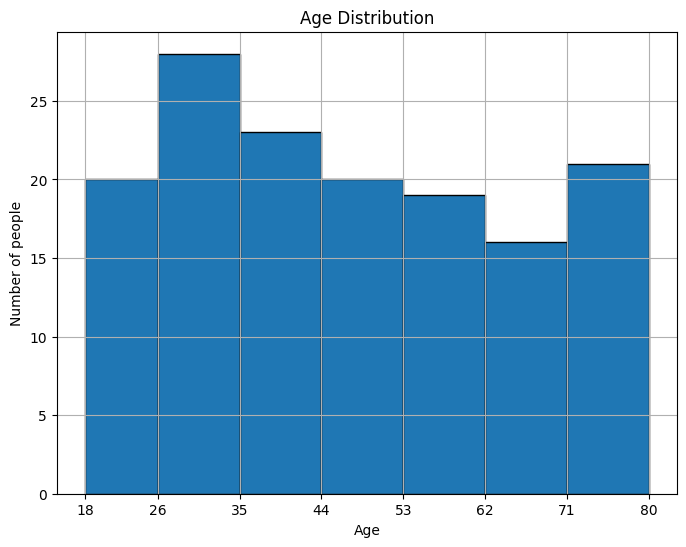

In [83]:
import matplotlib.pyplot as plt

# I want to create equal intervals between 18 and 80 (min and max)
bins = np.linspace(18, 80, 8).astype(int)  # I have decided to create 7 intervals

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(df_new['age'], bins=bins, edgecolor='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of people')

plt.xticks(bins)

plt.grid(True)

plt.show()

In the dataset, the majority of people are between 26 and 35 years old, followed by those aged between 35 and 44, and between 71 and 80 years old.

Gender:

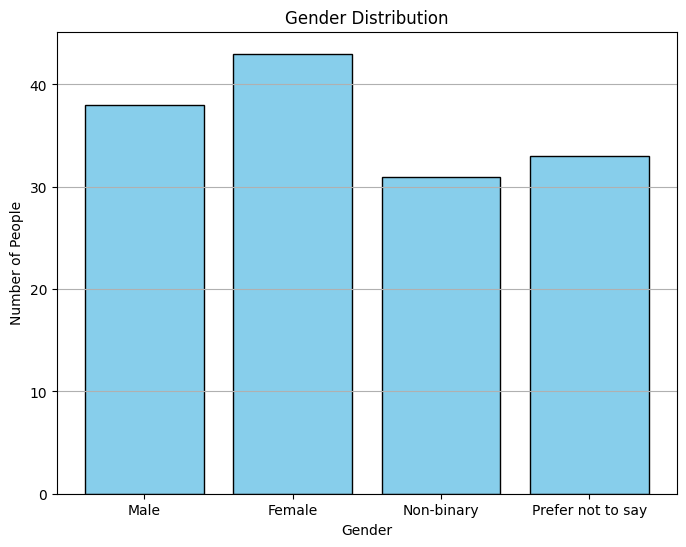

In [84]:
labels = ['Male', 'Female', 'Non-binary', 'Prefer not to say']

gender_counts = df_new['gender'].value_counts().reindex([0, 1, 2, 3], fill_value=0)

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, gender_counts, color='skyblue', edgecolor='black')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of People')

plt.grid(True, axis='y')

plt.show()

In the chart, a slight majority of females can be observed, followed by males and people who prefer not to specify their gender.

Education:

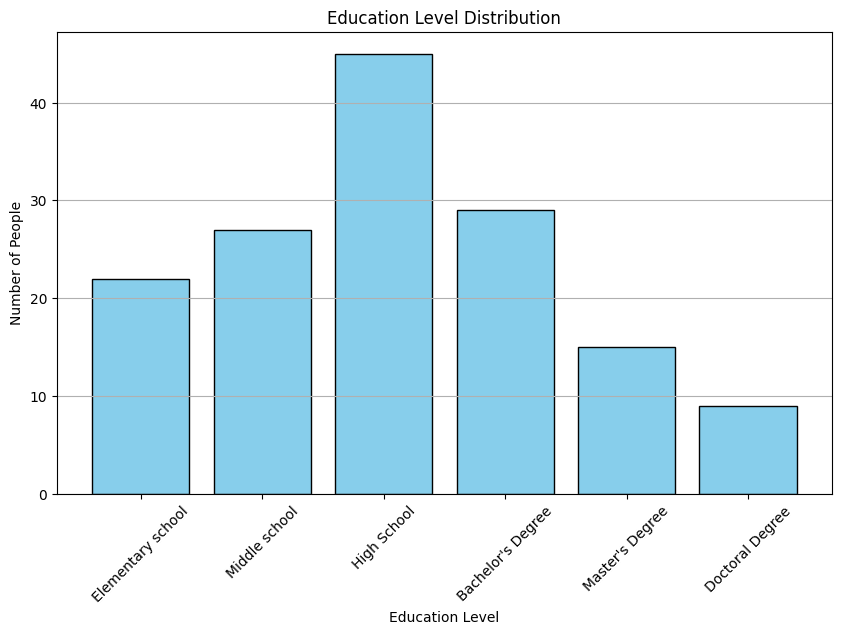

In [85]:
labels = ['Elementary school', 'Middle school', 'High School',
          "Bachelor's Degree", "Master's Degree", 'Doctoral Degree']

education_counts = df_new['education'].value_counts().reindex([5, 8, 13, 18, 22, 25], fill_value=0)

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, education_counts, color='skyblue', edgecolor='black')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of People')

plt.xticks(rotation=45)

plt.grid(True, axis='y')

plt.show()

In the chart, a clear predominance of people with a high school diploma can be seen, followed by those with a bachelor's degree and those who stopped at middle school.

Marital Status:

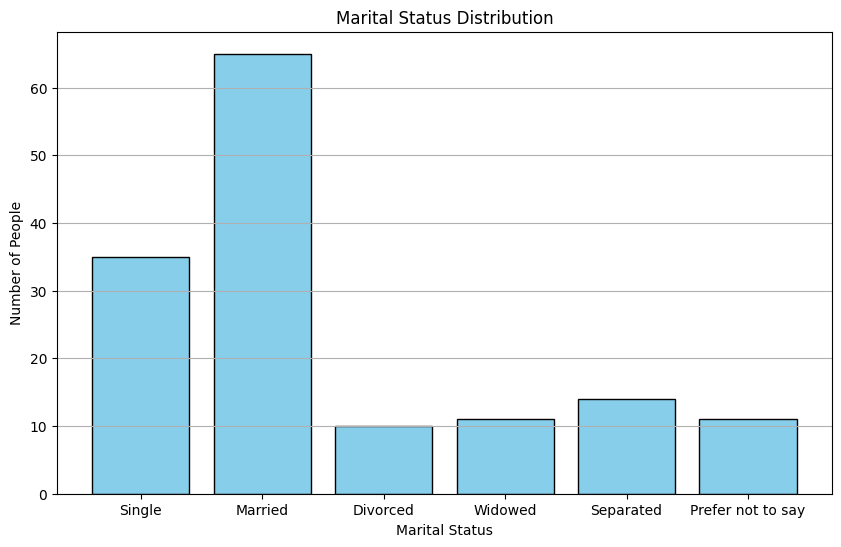

In [86]:
labels = ['Single', 'Married', 'Divorced', 'Widowed', 'Separated', 'Prefer not to say']

marital_counts = df_new['marital'].value_counts().reindex([0, 1, 2, 3, 4, 5], fill_value=0)

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, marital_counts, color='skyblue', edgecolor='black')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Number of People')

plt.grid(True, axis='y')

plt.show()

In the chart, a very clear predominance of married people can be observed, followed by a minority of single individuals.

Income:

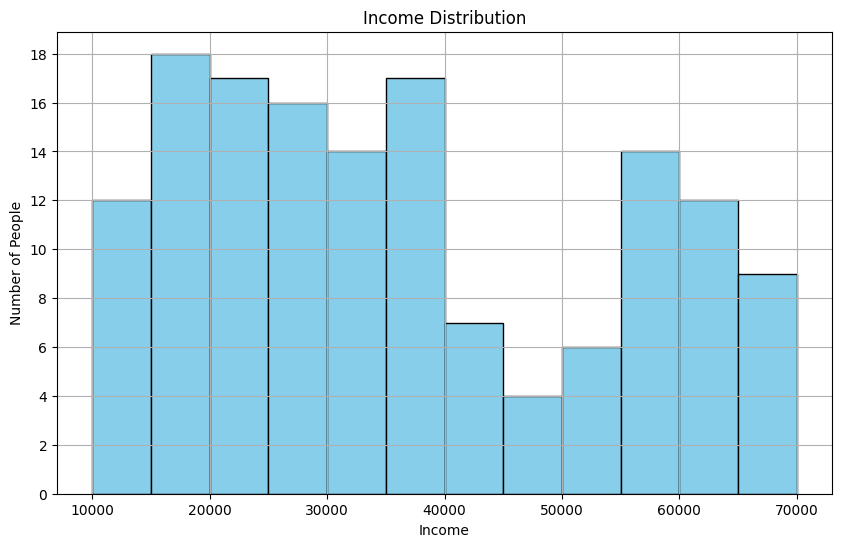

In [87]:
income_min = df_new['income'].min()
income_max = df_new['income'].max()

bins = np.arange(income_min, income_max + 5000, 5000)

# Histrogram
plt.figure(figsize=(10, 6))
plt.hist(df_new['income'], bins=bins, color='skyblue', edgecolor='black')

plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Number of People')

plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.grid(True)

plt.show()

Severity of the depression:

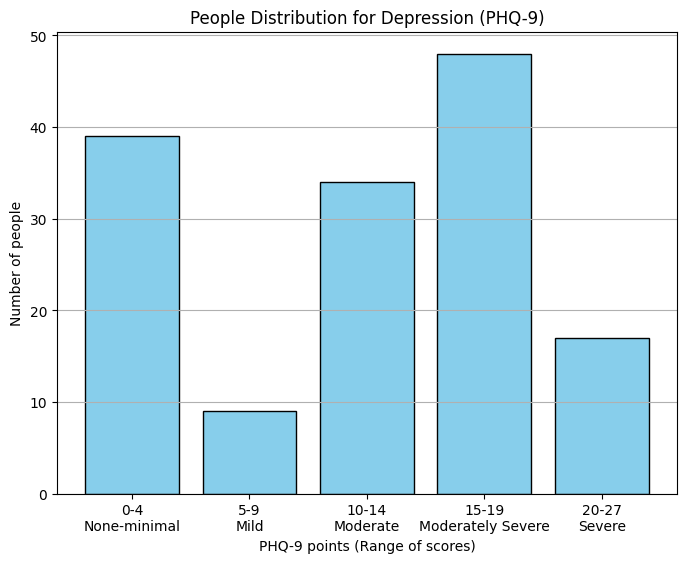

In [88]:
import numpy as np

# I define the bin edges and corresponding labels for the intervals (PHQ-9 for depression)
bins = [0, 4, 9, 14, 19, 27]
labels = ['0-4\nNone-minimal', '5-9\nMild', '10-14\nModerate', '15-19\nModerately Severe', '20-27\nSevere']

# I count how many people fall into each interval (PHQ-9 scores)
counts, _ = np.histogram(df_new['phq_tot'], bins=bins)

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='skyblue', edgecolor='black')

plt.title('People Distribution for Depression (PHQ-9)')
plt.xlabel('PHQ-9 points (Range of scores)')
plt.ylabel('Number of people')

plt.grid(True, axis='y')

plt.show()

The chart shows the distribution of people based on their PHQ-9 depression score, which measure the severity of depression. The PHQ-9 scores are divided into five categories:
- 0-4 (None-minimal): the second largest group falls within this category, with around 40 people showing little to no signs of depression;
- 5-9 (Mild): a small group, representing the fewest number of people, falls within the mild depression category, with fewer than 10 individuals;
- 10-14 (Moderate): a large number of individuals, around 35 people, have depression symptoms classified as moderate;
- 15-19 (Moderately Severe): the largest group, with over 45 individuals, falls into the moderately severe category, indicating a significant number of people experiencing serious depressive symptoms;
- 20-27 (Severe): a small group, slightly above 15 people, falls into the severe depression range.


Severity of the anxiety:

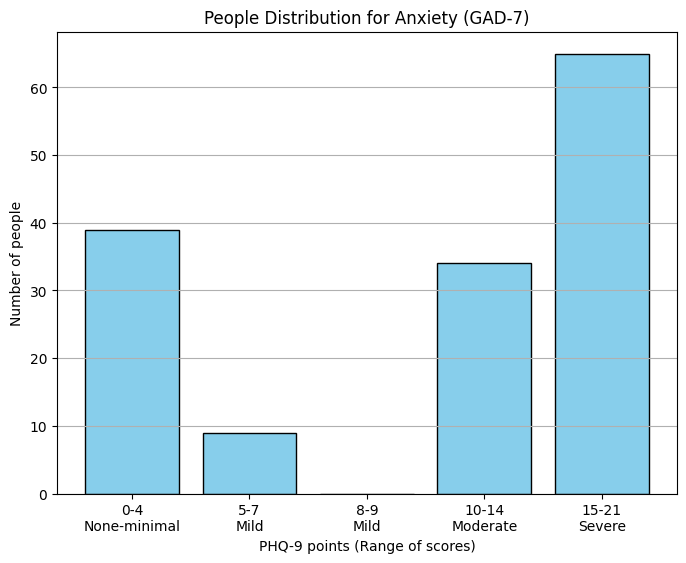

In [89]:
# I define the bin edges and corresponding labels for the intervals
bins = [0, 4, 7, 9, 14, 21]
labels = ['0-4\nNone-minimal', '5-7\nMild', '8-9\nMild', '10-14\nModerate', '15-21\nSevere']

# I count how many people fall into each interval (GAD-7)
counts, _ = np.histogram(df_new['phq_tot'], bins=bins)

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='skyblue', edgecolor='black')

plt.title('People Distribution for Anxiety (GAD-7)')
plt.xlabel('PHQ-9 points (Range of scores)')
plt.ylabel('Number of people')

plt.grid(True, axis='y')

plt.show()

This chart illustrates the distribution of people based on their GAD-7 anxiety score, which measure the severity of generalized anxiety disorder (GAD). The scores are divided into five categories, reflecting different levels of anxiety:

- 0-4 (None-minimal): this category represents the second largest group, with approximately 40 people exhibiting little to no anxiety symptoms;
- 5-7 (Mild): the number of people with mild anxiety is much smaller, with fewer than 10 individuals in this category;
- 8-9 (Mild): another small group, it seems only one person, falls in this range;
- 10-14 (Moderate): there is a moderate group of people, numbering around 20, showing notable anxiety symptoms but not reaching the severe level;
- 15-21 (Severe): the largest group falls into the "Severe" category, with more than 60 people displaying severe anxiety symptoms. This suggests that a significant portion of the dataset is experiencing high levels of anxiety according to the GAD-7 measure.

Severity of all the addictions:

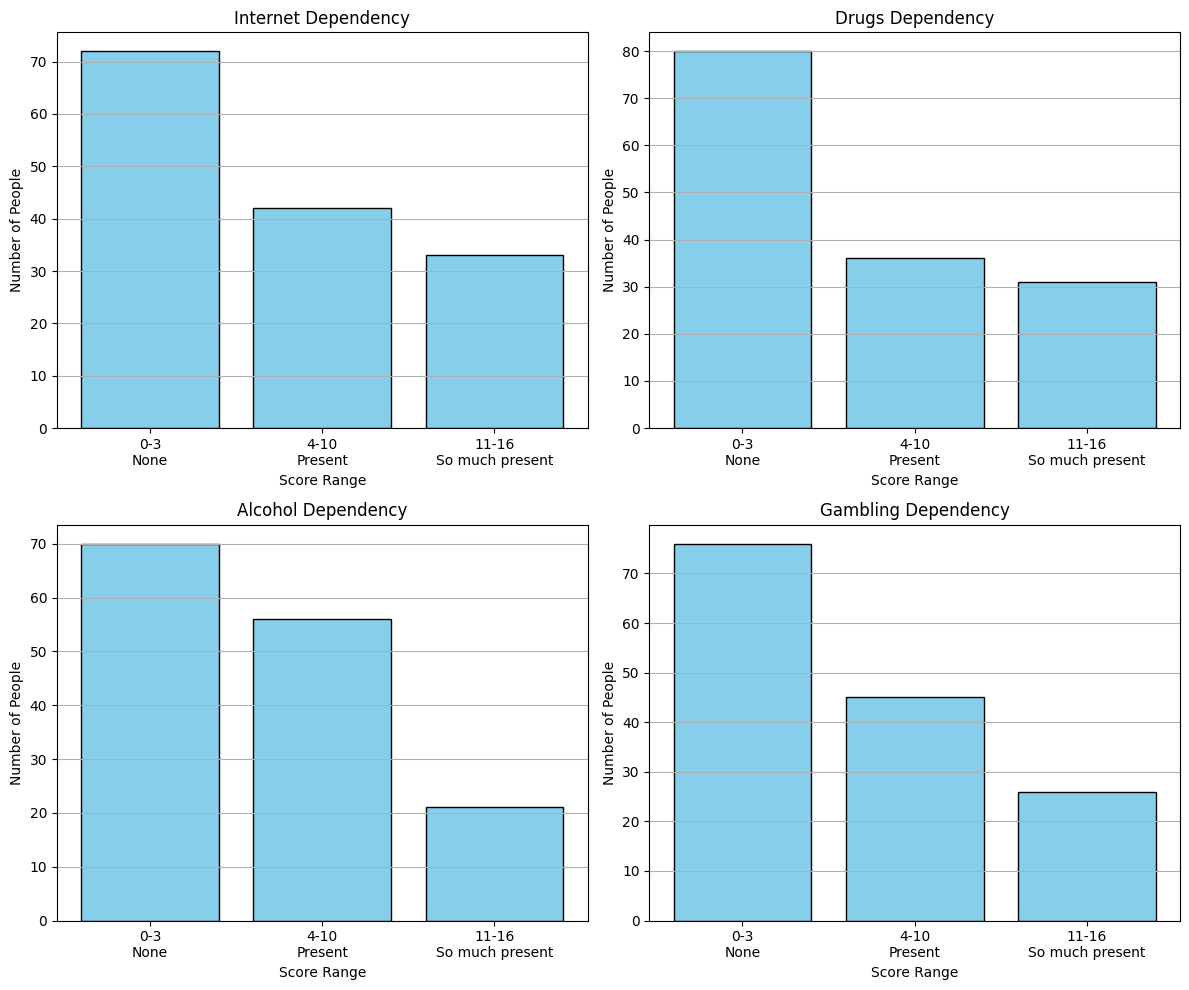

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# I define the bin edges and labels for the addictions
bins = [0, 3, 10, 16]
labels = ['0-3\nNone', '4-10\nPresent', '11-16\nSo much present']

# List of column names for each addiction type and their corresponding titles
addictions = {
    'Internet': 'ssba_internet_tot',
    'Drugs': 'ssba_drug_tot',
    'Alcohol': 'ssba_alcohol_tot',
    'Gambling': 'ssba_gambling_tot'
}

# I create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid of subplots

# I iterate through each addiction in order to create a separate bar chart
for ax, (addiction_name, column_name) in zip(axs.flatten(), addictions.items()):
    # I count how many people fall into each interval for the specific addiction
    counts, _ = np.histogram(df_new[column_name], bins=bins)

    # Bar chart for the current addiction
    ax.bar(labels, counts, color='skyblue', edgecolor='black')

    ax.set_title(f'{addiction_name} Dependency')
    ax.set_xlabel('Score Range')
    ax.set_ylabel('Number of People')
    ax.grid(True, axis='y')

plt.tight_layout()

plt.show()

<h3> Bivariate Analysis <h3>

- The *Pearson correlation coefficient* measures the linear relationship between two continuous variables (not categorical). It quantifies how strongly two variables are related to each other on a scale from -1 (perfect negative linear correlation -> as one variable increases, the other decreases) to 1 (perfect positive linear correlation -> as one variable increases, the other increases as well), with 0 which indicates there is no linear correlation between the variables.

- *Spearman's coefficient* is used to measure the strength and direction of a monotonic relationship between two variables. It’s often used when the relationship is non-linear but still monotonic, when  one or both variables are ordinal (ranked data) or when the data are not normally distributed. The scale goes from -1 (perfect negative monotonic relationship (-> as one variable increases, the other decreases consistently) to 1 (perfect positive monotonic relationship -> as one variable increases, the other increases consistently), with 0 which means no monotonic relationship (no consistent trend between the two variables).

- *ANOVA* (*Analysis of Variance*), is a statistical test used to compare the means of three or more groups to determine if there are significant differences between them. It is used when the dependent variable is continuous, such as test scores, and the independent variable is categorical, like age categories. The result of ANOVA is a p-value, and if the p-value is less than 0.05, it indicates that the group means are significantly different, leading to the rejection of the null hypothesis that all means are equal (so that all the groups are equal with no differences).


Now, I want to see how the other variables change with respect to the depression score of the questionnaire (phq_tot).


Age:

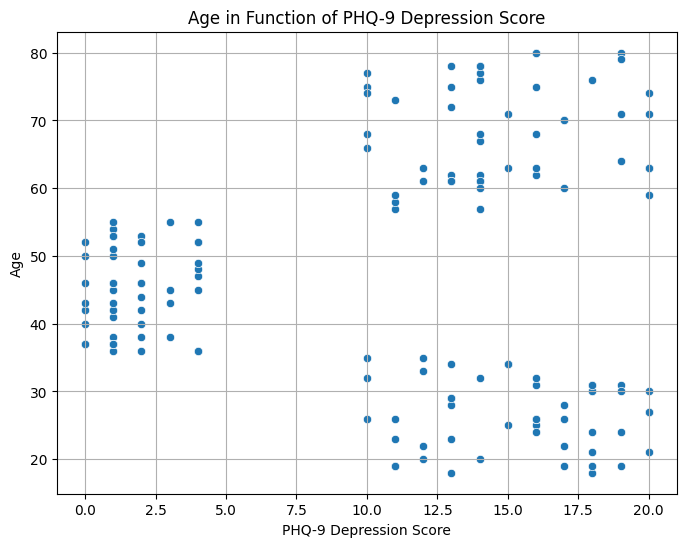

Lilliefors test for PHQ-9 score: statistic = 0.1654714023874168, p-value = 0.0009999999999998899
Lilliefors test for Age: statistic = 0.10166971896555099, p-value = 0.0019825876740248057
At least one of the variables does not follow a normal distribution, using Spearman's coefficient.
Spearman's coefficient between depression and age: -0.05115068405635078
Spearman's p-value: 0.5383713045017584


In [91]:
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm  # Module for the Lilliefors test
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_new['phq_tot'], y=df_new['age'])
plt.title('Age in Function of PHQ-9 Depression Score')
plt.xlabel('PHQ-9 Depression Score')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# Test di normalità per PHQ-9 (phq_tot) usando Lilliefors
stat_phq, p_value_phq = sm.stats.lilliefors(df_new['phq_tot'].dropna())
print(f"Lilliefors test for PHQ-9 score: statistic = {stat_phq}, p-value = {p_value_phq}")

# Test di normalità per Age (age) usando Lilliefors
stat_age, p_value_age = sm.stats.lilliefors(df_new['age'].dropna())
print(f"Lilliefors test for Age: statistic = {stat_age}, p-value = {p_value_age}")

# Se i dati non seguono una distribuzione normale, continua con lo Spearman's coefficient
if p_value_phq < 0.05 or p_value_age < 0.05:
    print("At least one of the variables does not follow a normal distribution, using Spearman's coefficient.")

    # Spearman's coefficient
    spearman_corr_age, spearman_p_value = stats.spearmanr(df_new['phq_tot'], df_new['age'])
    print(f"Spearman's coefficient between depression and age: {spearman_corr_age}")
    print(f"Spearman's p-value: {spearman_p_value}")
else:
    print("Both variables follow a normal distribution, consider using Pearson's coefficient.")

    # Pearson's coefficient (opzionale se i dati sono normali)
    pearson_corr_age = df_new['phq_tot'].corr(df_new['age'])
    print(f"Pearson's coefficient between depression and age: {pearson_corr_age}")


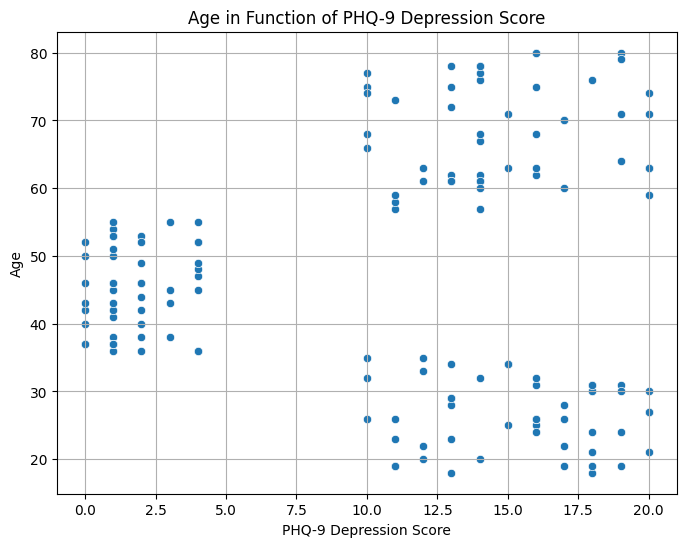

Spearman's coefficient between depression and age: -0.05115068405635078
Spearman's p-value: 0.5383713045017584


In [92]:
import seaborn as sns
import scipy.stats as stats

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_new['phq_tot'], y=df_new['age'])
plt.title('Age in Function of PHQ-9 Depression Score')
plt.xlabel('PHQ-9 Depression Score')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# Spearman's coefficient
spearman_corr_age, spearman_p_value = stats.spearmanr(df_new['phq_tot'], df_new['age'])
print(f"Spearman's coefficient between depression and age: {spearman_corr_age}")
print(f"Spearman's p-value: {spearman_p_value}")

- Young People (20-35): there are individuals with both mild and severe levels of depression.
- Adults (30-50): many participants seem to have lower depression scores (between 0 and 5).
- Elderly (60 and above): PHQ-9 scores tend to be higher, which might indicate a trend toward more severe levels of depression among older individuals.

The Spearman's coefficient between depression (PHQ-9 score) and age is -0.051. This indicates a very weak negative monotonic relationship between these two variables, meaning that as one variable increases, the other tends to slightly decrease, but the effect is extremely small. The p-value is 0.538, which is much higher than the common significance level of 0.05. So, the correlation is not statistically significant.

Gender:

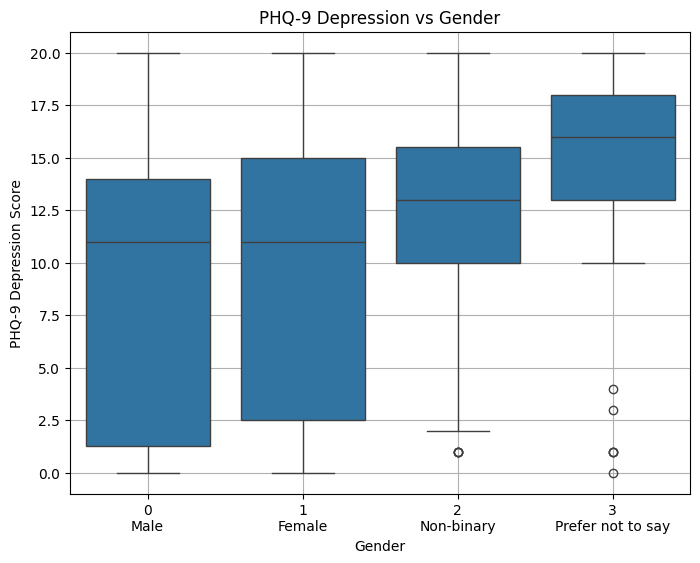

                sum_sq     df         F    PR(>F)
C(gender)   468.578395    3.0  3.636547  0.014458
Residual   6056.069881  141.0       NaN       NaN


In [93]:
# I need these libraries for the ANOVA test
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Box plot to compare depression scores with gender categories
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new['gender'], y=df_new['phq_tot'])

plt.xticks([0, 1, 2, 3], ['0\nMale', '1\nFemale', '2\nNon-binary', '3\nPrefer not to say'])

plt.title('PHQ-9 Depression vs Gender')
plt.xlabel('Gender')
plt.ylabel('PHQ-9 Depression Score')
plt.grid(True)
plt.show()

# ANOVA test
model = ols('phq_tot ~ C(gender)', data=df_new).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

Individuals who identify as female, non-binary, or that prefer to not say their gender tend to have higher median depression scores compared to males.

From the ANOVA, I see that the p-value (PR(>F) = 0.0145) is 0.0145, which is less than the conventional significance level of 0.05. Therefore, the differences in depression scores between gender groups are statistically significant, and it is possible to reject the null hypothesis. The null hypothesis states that there are no significant differences between the groups with respect to the dependent variable (in this case, depression scores).

Gender have a significant effect on depression scores.

Education:

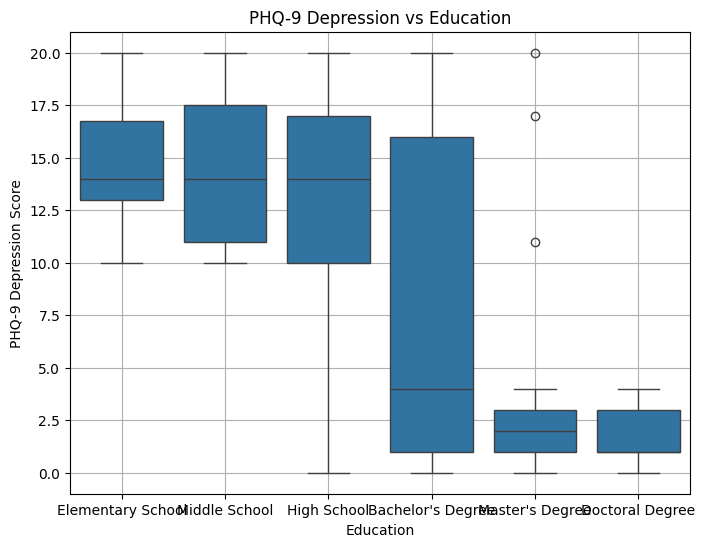

                   sum_sq     df          F        PR(>F)
C(education)  2222.089389    5.0  14.035064  3.919021e-11
Residual      4464.740543  141.0        NaN           NaN


In [94]:
# Box plot to compare depression scores with education categories
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new['education'], y=df_new['phq_tot'])

plt.xticks([0, 1, 2, 3, 4, 5], ['Elementary School', 'Middle School', 'High School', 'Bachelor\'s Degree', 'Master\'s Degree', 'Doctoral Degree'])

plt.title('PHQ-9 Depression vs Education')
plt.xlabel('Education')
plt.ylabel('PHQ-9 Depression Score')
plt.grid(True)
plt.show()

model = ols('phq_tot ~ C(education)', data=df_new).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

There is a statistically significant relationship between education level and depression scores. Individuals with higher education tend to report lower depression scores, while those with lower education levels report higher scores.

Marital status:

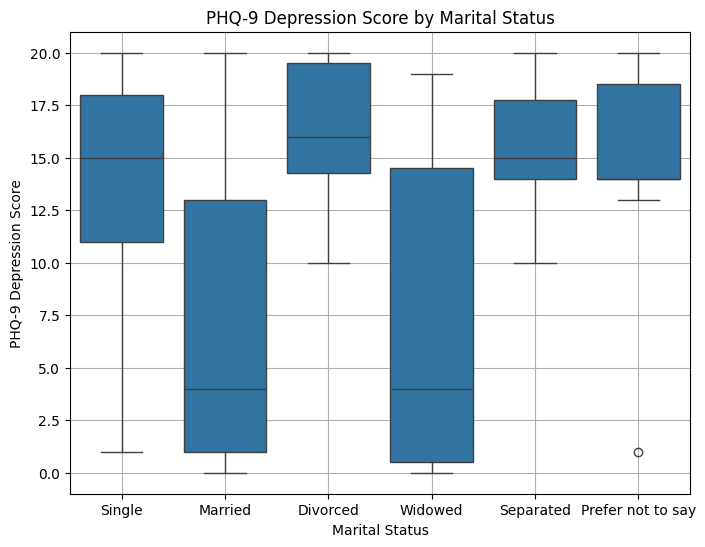

                 sum_sq     df         F        PR(>F)
C(marital)  2197.869797    5.0  13.71446  6.768019e-11
Residual    4487.260340  140.0       NaN           NaN


In [95]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new['marital'], y=df_new['phq_tot'])

plt.xticks([0, 1, 2, 3, 4, 5], ['Single', 'Married', 'Divorced', 'Widowed', 'Separated', 'Prefer not to say'])

plt.title('PHQ-9 Depression Score by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('PHQ-9 Depression Score')
plt.grid(True)
plt.show()

# ANOVA
model_marital_status = ols('phq_tot ~ C(marital)', data=df_new).fit()
anova_table_marital_status = sm.stats.anova_lm(model_marital_status, typ=2)

print(anova_table_marital_status)

Divorced individuals have the highest depression scores, while married and widowed individuals show lower median depression scores. Single and separated individuals have moderate depression levels, with the married group having the lowest overall.
The p-value is very small, much smaller than the standard threshold of 0.05. So, there are significant differences in depression scores between the different marital status groups.

Income:

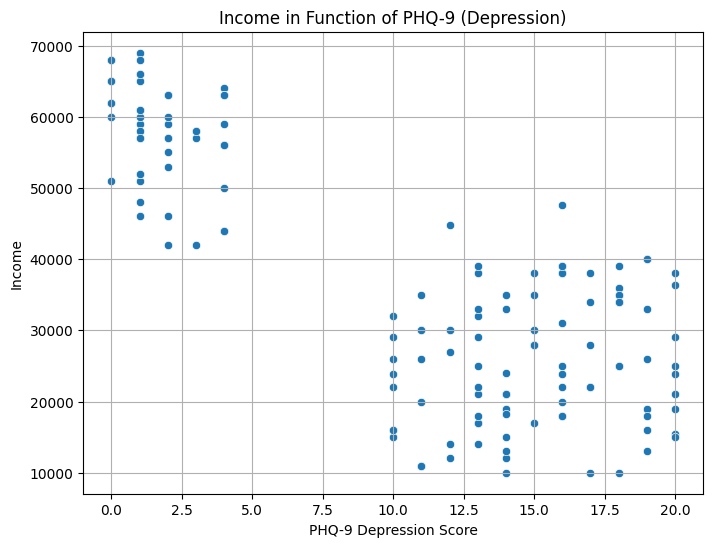

Spearman's coefficient between depression and income: -0.6239000448706427
Spearman's p-value: 4.0220309905787454e-17


In [96]:
# Scatter plot between PHQ-9 (depression) and income
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_new['phq_tot'], y=df_new['income'])
plt.title('Income in Function of PHQ-9 (Depression)')
plt.xlabel('PHQ-9 Depression Score')
plt.ylabel('Income')
plt.grid(True)
plt.show()

# I need to remove the rows with null values in the columns to perform the Spearman's coefficient correlation
df_cleaned = df_new[['phq_tot', 'income']].dropna()

spearman_corr_income, spearman_p_value = stats.spearmanr(df_cleaned['phq_tot'], df_cleaned['income'])
print(f"Spearman's coefficient between depression and income: {spearman_corr_income}")
print(f"Spearman's p-value: {spearman_p_value}")

The Spearman's coefficient between depression and income is -0.624, indicating a moderately strong negative monotonic relationship. This suggests that as income decreases, depression scores tend to increase. The p-value is extremely small, meaning this correlation is statistically significant.

Anxiety:

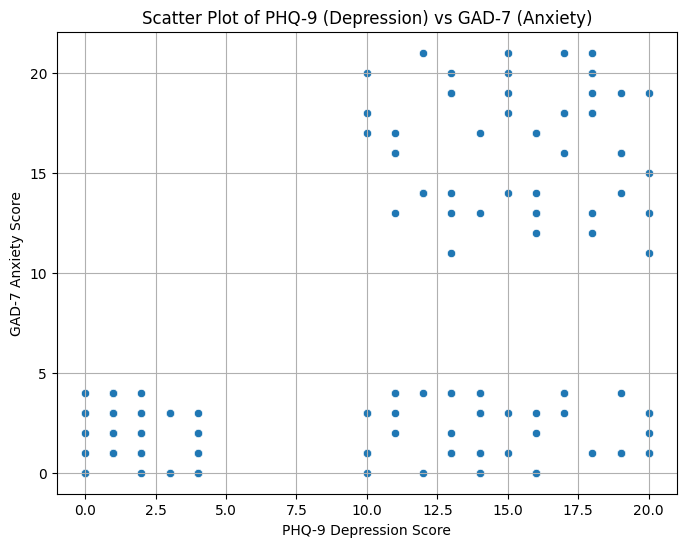

Pearson's coefficient between depression and anxiety: 0.47465955383928093


In [97]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_new['phq_tot'], y=df_new['gad_tot'])
plt.title('Scatter Plot of PHQ-9 (Depression) vs GAD-7 (Anxiety)')
plt.xlabel('PHQ-9 Depression Score')
plt.ylabel('GAD-7 Anxiety Score')
plt.grid(True)
plt.show()

# Pearson's coefficient
pearson_corr_gad = df_new['phq_tot'].corr(df_new['gad_tot'])
print(f'Pearson\'s coefficient between depression and anxiety: {pearson_corr_gad}')

The Pearson correlation between PHQ-9 (depression) and GAD-7 (anxiety) is 0.475. The correlation is not perfect, but it suggests that individuals with higher levels of depression tend to have higher levels of anxiety.



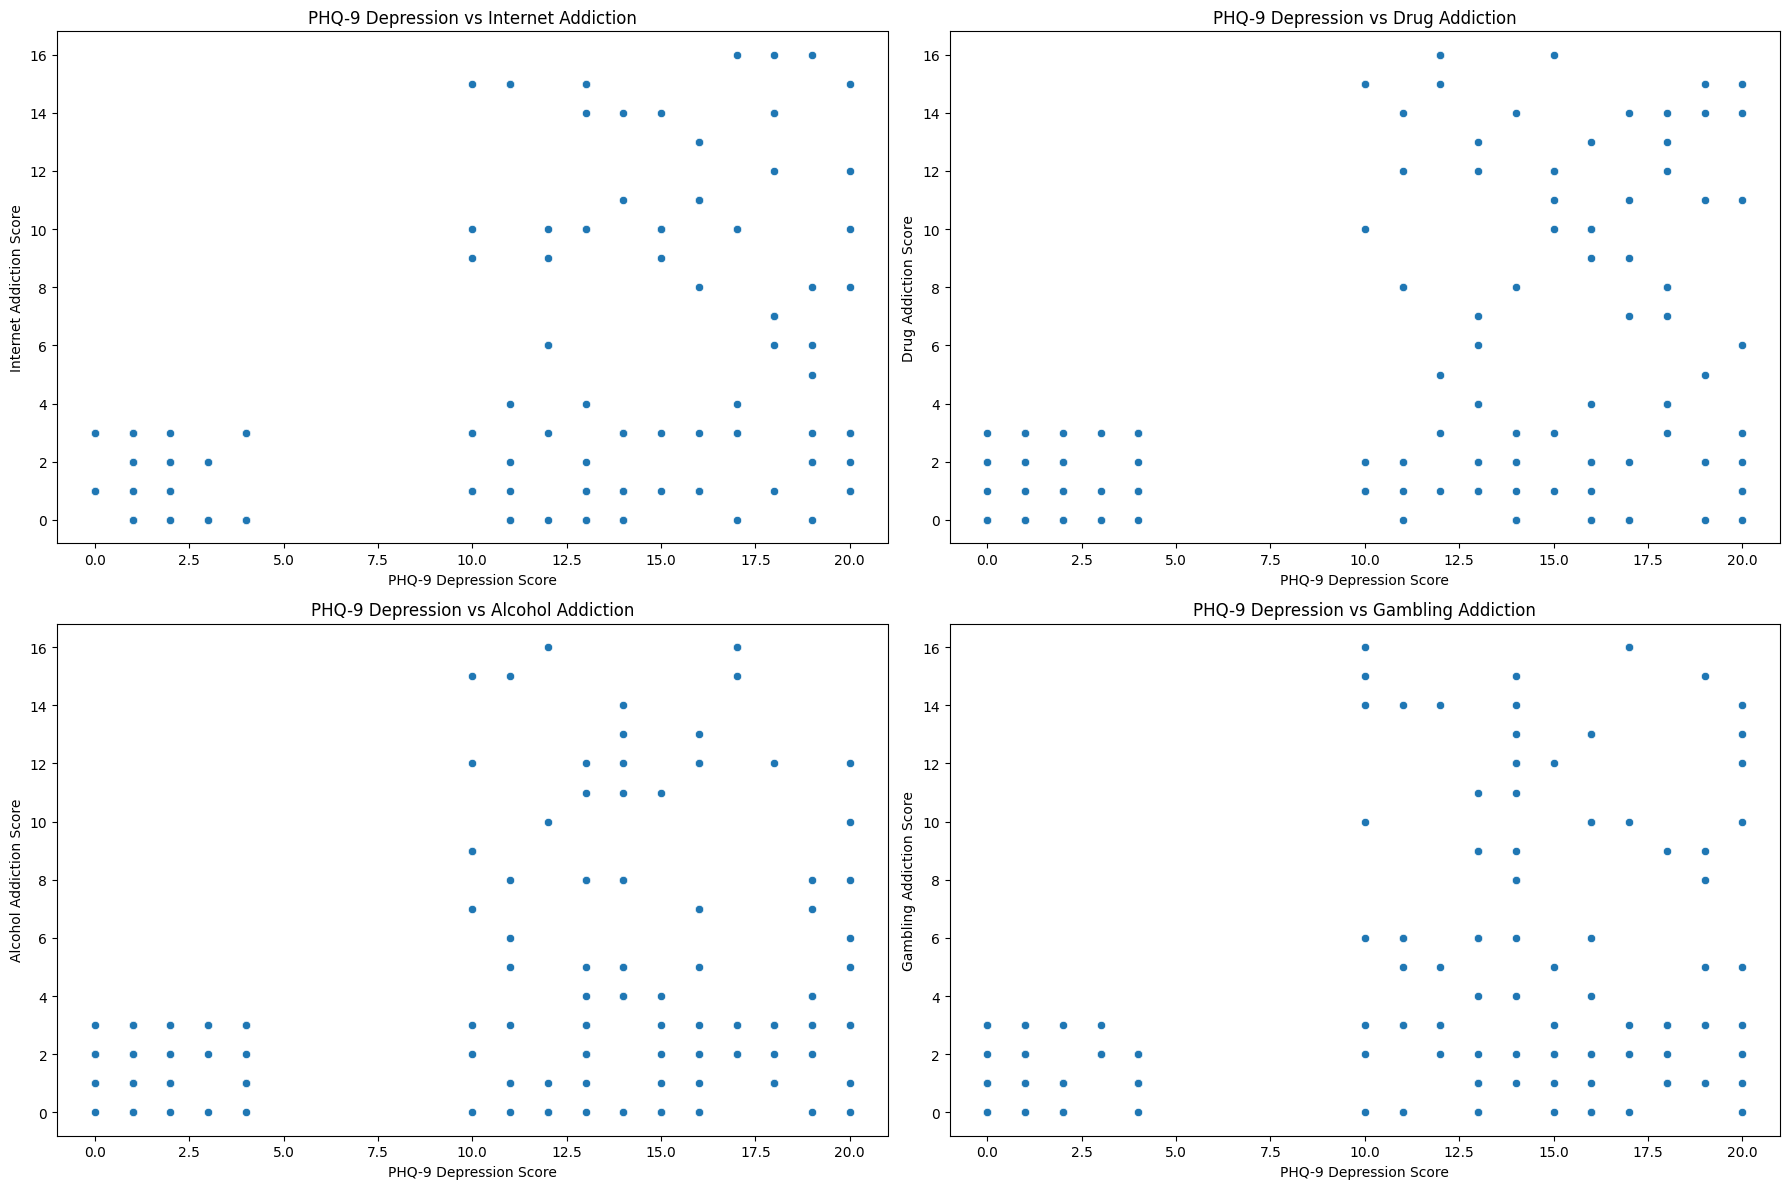

{'Internet Addiction': 0.44276705868961225, 'Drug Addiction': 0.4282458480484337, 'Alcohol Addiction': 0.3402524123790326, 'Gambling Addiction': 0.392032987338673}


In [98]:
# List of addictions and titles
addictions = ['ssba_internet_tot', 'ssba_drug_tot', 'ssba_alcohol_tot', 'ssba_gambling_tot']
addiction_titles = ['Internet Addiction', 'Drug Addiction', 'Alcohol Addiction', 'Gambling Addiction']

# Pearson results
pearson_corrs = {}

# Create scatter plot with PHQ-9 Depression on the x-axis
plt.figure(figsize=(18, 12))

for i, addiction in enumerate(addictions):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df_new['phq_tot'], y=df_new[addiction])
    plt.title(f'PHQ-9 Depression vs {addiction_titles[i]}')
    plt.xlabel('PHQ-9 Depression Score')
    plt.ylabel(f'{addiction_titles[i]} Score')

    # Calculate Pearson correlation
    pearson_corr = df_new['phq_tot'].corr(df_new[addiction])
    pearson_corrs[addiction_titles[i]] = pearson_corr

# Adjust layout
plt.tight_layout()
plt.show()

# Print Pearson correlation results
print(pearson_corrs)

All four addictions show positive correlations with depression, meaning that higher depression scores tend to be associated with higher addiction levels. Internet and drug addiction have the strongest correlations with depression, while alcohol has the weakest correlation among the four.

<h3>Multivariate Analysis<h3>

<Axes: >

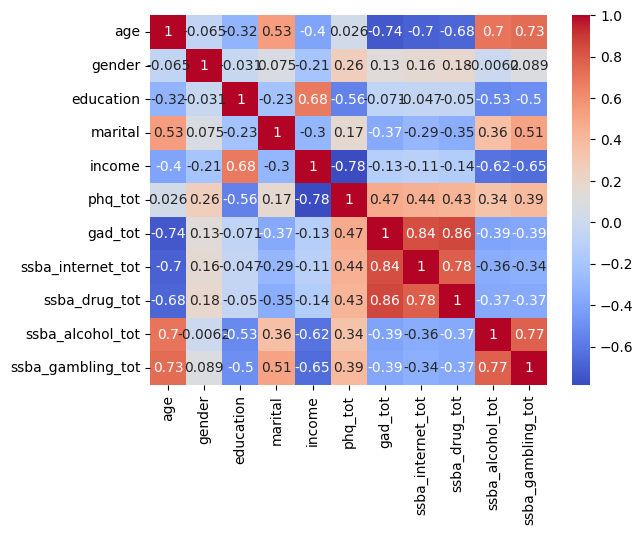

In [99]:
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')

<h2>DATA ANALYSIS<h2>

<h3>Data Preparation<h3>

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 93 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              160 non-null    int64  
 1   gender           158 non-null    float64
 2   education        160 non-null    int64  
 3   marital          159 non-null    float64
 4   income           159 non-null    float64
 5   phq_1            159 non-null    float64
 6   phq_2            160 non-null    int64  
 7   phq_3            160 non-null    int64  
 8   phq_4            160 non-null    int64  
 9   phq_5            160 non-null    int64  
 10  phq_6            158 non-null    float64
 11  phq_7            160 non-null    int64  
 12  phq_8            160 non-null    int64  
 13  phq_9            159 non-null    float64
 14  gad_1            160 non-null    int64  
 15  gad_2            160 non-null    int64  
 16  gad_3            160 non-null    int64  
 17  gad_4           

I want to remove rows which have NaN values in the 'gender', 'marital' and 'income' variables.

In [101]:
df_new_PCA = df.copy()

# I drop the rows which have null values in the columns that I need
df_new_PCA = df_new_PCA.dropna(subset=['gender', 'marital', 'income'])
df_new_PCA = df_new_PCA.dropna(subset=[f'phq_{i}' for i in range(1, 10)])
df_new_PCA = df_new_PCA.dropna(subset=[f'gad_{i}' for i in range(1, 8)])
df_new_PCA = df_new_PCA.dropna(subset=[f'ssba_internet_{i}' for i in range(1, 5)])
df_new_PCA = df_new_PCA.dropna(subset=[f'ssba_drug_{i}' for i in range(1, 5)])
df_new_PCA = df_new_PCA.dropna(subset=[f'ssba_alcohol_{i}' for i in range(1, 5)])
df_new_PCA = df_new_PCA.dropna(subset=[f'ssba_gambling_{i}' for i in range(1, 5)])

# I drop the columns that are useless for me
df_new_PCA = df_new_PCA.drop(columns=[f'asrs_{i}' for i in range(1, 7)])
df_new_PCA = df_new_PCA.drop(columns=[f'asq_{i}' for i in range(1, 51)])

# The index must be from 0 to the maximum number of the actual dataset df_new_PCA
df_new_PCA.reset_index(drop=True, inplace=True)

df_new_PCA

,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,phq_5,...,ssba_drug_3,ssba_drug_4,ssba_alcohol_1,ssba_alcohol_2,ssba_alcohol_3,ssba_alcohol_4,ssba_gambling_1,ssba_gambling_2,ssba_gambling_3,ssba_gambling_4
0,18,2.0,13,0.0,38000.0,0.0,1,3,0,0,...,1,1,2,0,0,0.0,1.0,1.0,0.0,0.0
1,62,1.0,5,1.0,22000.0,0.0,2,2,2,2,...,0,0,4,1,3,4.0,0.0,4.0,0.0,2.0
2,31,1.0,13,0.0,33000.0,3.0,1,3,0,3,...,4,4,1,1,0,1.0,1.0,0.0,2.0,0.0
3,76,3.0,8,4.0,10000.0,2.0,3,2,2,2,...,1,2,3,2,3,4.0,2.0,2.0,4.0,1.0
4,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,80,2.0,18,3.0,18000.0,1.0,2,1,3,3,...,0,1,4,2,0,1.0,3.0,3.0,0.0,4.0
139,19,2.0,8,0.0,30000.0,2.0,0,0,0,2,...,4,0,0,0,0,1.0,1.0,0.0,0.0,2.0
140,26,3.0,18,0.0,39000.0,2.0,2,3,3,0,...,3,4,0,0,2,0.0,0.0,0.0,0.0,2.0
141,46,1.0,22,1.0,57000.0,0.0,0,1,0,0,...,0,1,0,1,0,0.0,0.0,0.0,1.0,0.0


I have obtained a new dataset with 143 rows and 37 columns.

To include categorical variables in the PCA, I need to convert them into numerical variables. I decide to use the One-Hot Encoding, which transforms categorical variables into binary variables. I do this for the variables 'gender' and 'marital'.


Education is a categorical variable that represents an ordered progression so, I don't  apply One-Hot Encoding. I treat them as ordinal variables. With PCA, the variable is treated as continuous data. The same is for the phq responses and the gad responses and the ssba responses.

<h3>PCA<h3>

In [102]:
# I have to convert 'gender' and 'marital' and 'education' columns to integer type
df_new_PCA['gender'] = df_new_PCA['gender'].astype(int)
df_new_PCA['marital'] = df_new_PCA['marital'].astype(int)
df_new_PCA['education'] = df_new_PCA['education'].astype(int)

# I apply One-Hot Encoding
df_new_PCA = pd.get_dummies(df_new_PCA, columns=['gender', 'marital', 'education'], drop_first=False)

print(df_new_PCA)

     age   income  phq_1  phq_2  phq_3  phq_4  phq_5  phq_6  phq_7  phq_8  \
0     18  38000.0    0.0      1      3      0      0    3.0      1      3   
1     62  22000.0    0.0      2      2      2      2    1.0      3      2   
2     31  33000.0    3.0      1      3      0      3    2.0      3      1   
3     76  10000.0    2.0      3      2      2      2    2.0      0      2   
4     19  30000.0    2.0      0      0      0      2    2.0      3      0   
..   ...      ...    ...    ...    ...    ...    ...    ...    ...    ...   
138   80  18000.0    1.0      2      1      3      3    1.0      0      3   
139   19  30000.0    2.0      0      0      0      2    2.0      3      0   
140   26  39000.0    2.0      2      3      3      0    0.0      2      3   
141   46  57000.0    0.0      0      1      0      0    0.0      1      0   
142   46  61000.0    0.0      0      0      0      0    0.0      0      1   

     ...  marital_2  marital_3  marital_4  marital_5  education_5  \
0    .

I have to standardize numerical data

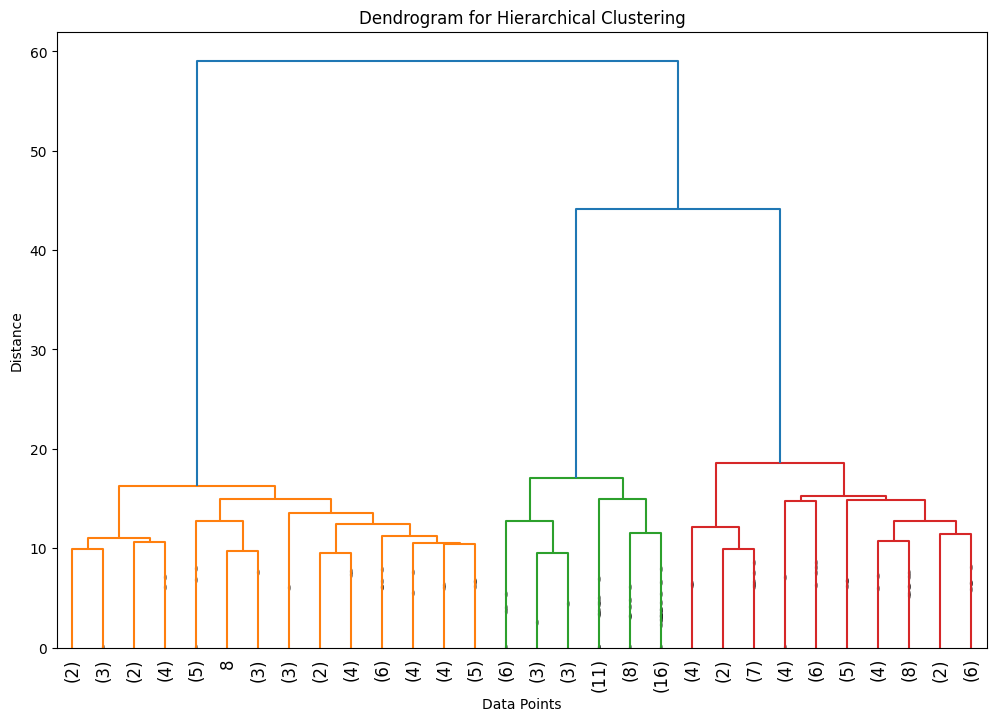

In [103]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score


# I standardize the data with mean = 0 and variance = 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_new_PCA)

linkage_matrix = linkage(scaled_data, method='ward')

# Plot
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.axhline(y=150, color='r', linestyle='--')
plt.show()

From the graph I can see that I can reduce the dataset (df_new_PCA) dimensionality to 26 components without losing too much information because the 90% of the variance is retained.


<h3>Optimal Number of Clusters<h3>

Cluster Distribution:
 Cluster
1    48
3    48
2    47
Name: count, dtype: int64


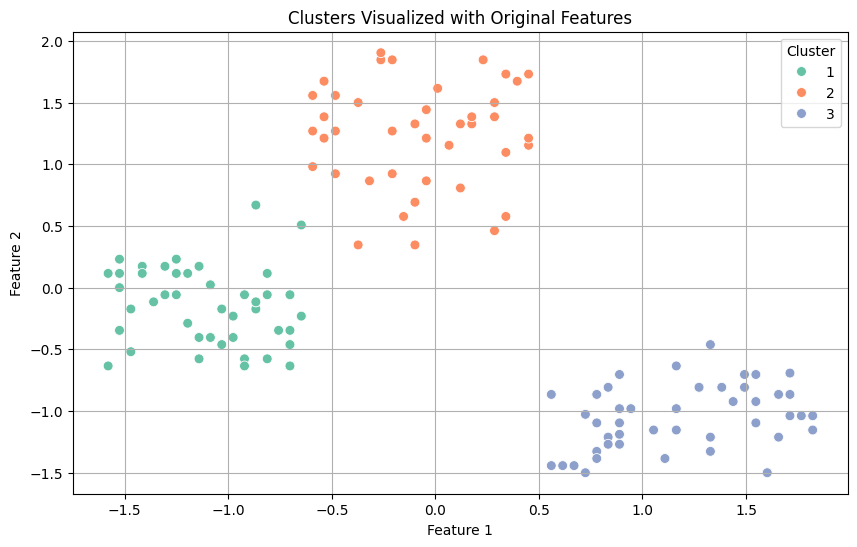

Silhouette Score for Hierarchical Clustering: 0.23180608316915333


In [104]:
num_clusters = 3  # Example: adjust based on your analysis of the dendrogram

# Assign cluster labels to each data point
cluster_labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Add the cluster labels to the original dataframe
df_new_PCA['Cluster'] = cluster_labels

# Display cluster distribution
print("Cluster Distribution:\n", df_new_PCA['Cluster'].value_counts())

# Visualize clusters using the first two features as an example
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=cluster_labels, palette='Set2', s=50)
plt.title('Clusters Visualized with Original Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

# Calculate silhouette score for the clustering
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg}")



Both the Elbow Method and the Silhouette Score suggest that 3 clusters is the optimal number of clusters for these data. This is supported by the elbow point in the inertia plot and the highest silhouette score at 3 clusters.

<h3>Clustering<h3>

I decided to apply the KMeans algorithm with k equal to 3 because, after analyzing both the Elbow Method and the Silhouette Score, we identified that the optimal number of clusters is 3.

In [105]:
print(df_new_PCA.columns)  # Stampa tutti i nomi delle colonne per verificare

Index(['age', 'income', 'phq_1', 'phq_2', 'phq_3', 'phq_4', 'phq_5', 'phq_6',
       'phq_7', 'phq_8', 'phq_9', 'gad_1', 'gad_2', 'gad_3', 'gad_4', 'gad_5',
       'gad_6', 'gad_7', 'ssba_internet_1', 'ssba_internet_2',
       'ssba_internet_3', 'ssba_internet_4', 'ssba_drug_1', 'ssba_drug_2',
       'ssba_drug_3', 'ssba_drug_4', 'ssba_alcohol_1', 'ssba_alcohol_2',
       'ssba_alcohol_3', 'ssba_alcohol_4', 'ssba_gambling_1',
       'ssba_gambling_2', 'ssba_gambling_3', 'ssba_gambling_4', 'gender_0',
       'gender_1', 'gender_2', 'gender_3', 'marital_0', 'marital_1',
       'marital_2', 'marital_3', 'marital_4', 'marital_5', 'education_5',
       'education_8', 'education_13', 'education_18', 'education_22',
       'education_25', 'Cluster'],
      dtype='object')


In [106]:
df_new_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 51 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              143 non-null    int64  
 1   income           143 non-null    float64
 2   phq_1            143 non-null    float64
 3   phq_2            143 non-null    int64  
 4   phq_3            143 non-null    int64  
 5   phq_4            143 non-null    int64  
 6   phq_5            143 non-null    int64  
 7   phq_6            143 non-null    float64
 8   phq_7            143 non-null    int64  
 9   phq_8            143 non-null    int64  
 10  phq_9            143 non-null    float64
 11  gad_1            143 non-null    int64  
 12  gad_2            143 non-null    int64  
 13  gad_3            143 non-null    int64  
 14  gad_4            143 non-null    int64  
 15  gad_5            143 non-null    float64
 16  gad_6            143 non-null    int64  
 17  gad_7           

I divide the dataset according to the three clusters.

In [107]:
# I divide the dataset in three datasets based on the three clusters
cluster_1 = df_new_PCA[df_new_PCA['Cluster'] == 1]
cluster_2 = df_new_PCA[df_new_PCA['Cluster'] == 2]
cluster_3 = df_new_PCA[df_new_PCA['Cluster'] == 3]

cluster_1

,age,income,phq_1,phq_2,phq_3,phq_4,phq_5,phq_6,phq_7,phq_8,...,marital_3,marital_4,marital_5,education_5,education_8,education_13,education_18,education_22,education_25,Cluster
0,18,38000.0,0.0,1,3,0,0,3.0,1,3,...,False,False,False,False,False,True,False,False,False,1
2,31,33000.0,3.0,1,3,0,3,2.0,3,1,...,False,False,False,False,False,True,False,False,False,1
4,19,30000.0,2.0,0,0,0,2,2.0,3,0,...,False,False,False,False,True,False,False,False,False,1
5,30,25000.0,3.0,1,3,0,3,3.0,3,1,...,False,False,False,False,False,False,True,False,False,1
6,35,32000.0,0.0,3,0,0,2,0.0,0,2,...,False,False,False,False,True,False,False,False,False,1
8,35,44800.0,3.0,0,0,0,2,2.0,2,0,...,False,False,False,False,True,False,False,False,False,1
13,24,35000.0,0.0,1,3,2,1,2.0,3,3,...,False,False,False,False,False,True,False,False,False,1
17,26,29000.0,2.0,3,0,3,0,0.0,2,0,...,False,False,False,False,False,True,False,False,False,1
20,25,31000.0,1.0,3,0,3,1,2.0,1,3,...,False,False,False,False,True,False,False,False,False,1
23,26,26000.0,3.0,1,0,2,0,3.0,1,0,...,False,False,False,False,True,False,False,False,False,1


Cluster 0 has 48 rows and 46 columns.

In [108]:
cluster_2

,age,income,phq_1,phq_2,phq_3,phq_4,phq_5,phq_6,phq_7,phq_8,...,marital_3,marital_4,marital_5,education_5,education_8,education_13,education_18,education_22,education_25,Cluster
9,47,64000.0,0.0,0,0,0,1,0.0,1,1,...,False,False,False,False,False,False,False,True,False,2
14,52,62000.0,0.0,0,0,0,0,0.0,0,0,...,True,False,False,False,False,False,False,False,True,2
15,38,58000.0,0.0,1,1,0,0,0.0,0,0,...,False,False,False,False,False,True,False,False,False,2
19,41,51000.0,0.0,0,0,0,1,0.0,0,0,...,False,False,False,False,False,True,False,False,False,2
21,48,56000.0,1.0,0,0,0,0,1.0,1,1,...,True,False,False,False,False,False,False,False,True,2
22,38,63000.0,1.0,0,0,0,1,0.0,0,0,...,False,False,False,False,False,True,False,False,False,2
25,36,63000.0,0.0,1,0,1,0,1.0,0,0,...,False,False,False,False,False,False,True,False,False,2
30,53,66000.0,0.0,0,0,0,0,0.0,0,0,...,False,False,False,False,False,False,True,False,False,2
32,40,42000.0,0.0,0,0,0,1,1.0,0,0,...,False,False,False,False,False,False,False,True,False,2
37,38,52000.0,0.0,0,0,0,0,0.0,1,0,...,False,False,False,False,False,False,True,False,False,2


Cluster 1 has 47 rows and 46 columns.

In [109]:
cluster_3

,age,income,phq_1,phq_2,phq_3,phq_4,phq_5,phq_6,phq_7,phq_8,...,marital_3,marital_4,marital_5,education_5,education_8,education_13,education_18,education_22,education_25,Cluster
1,62,22000.0,0.0,2,2,2,2,1.0,3,2,...,False,False,False,True,False,False,False,False,False,3
3,76,10000.0,2.0,3,2,2,2,2.0,0,2,...,False,True,False,False,True,False,False,False,False,3
7,75,17000.0,2.0,1,3,0,3,1.0,0,3,...,False,False,False,True,False,False,False,False,False,3
10,68,25000.0,3.0,3,0,2,3,2.0,1,0,...,False,True,False,False,True,False,False,False,False,3
11,67,12000.0,3.0,1,3,1,1,1.0,2,2,...,False,True,False,True,False,False,False,False,False,3
12,68,16000.0,1.0,3,0,0,0,2.0,0,3,...,False,False,False,True,False,False,False,False,False,3
16,61,21000.0,3.0,3,3,0,2,0.0,3,0,...,False,False,True,True,False,False,False,False,False,3
18,57,21000.0,2.0,1,3,0,3,3.0,0,0,...,False,True,False,False,False,True,False,False,False,3
24,62,15000.0,2.0,1,0,2,3,2.0,3,1,...,False,True,False,True,False,False,False,False,False,3
26,57,11000.0,2.0,2,0,0,0,3.0,2,2,...,False,True,False,True,False,False,False,False,False,3


Cluster 2 has 48 rows and 46 columns.

<h3>Statistical Analysis<h3>

- *Kruskal-Wallis test*: it is used to compare the distributions of three or more independent groups. It is an extension of the Mann-Whitney U test, which is used to compare two groups. The Kruskal-Wallis test checks the null hypothesis that the distributions of the groups are the same, meaning there are no significant differences between the medians of the groups. The alternative hypothesis is that at least one of the distributions is significantly different from the others. This test is applied when the data is not normally distributed, when working with ordinal data, and when comparing more than two independent groups. It works by ranking all the data from all groups combined and assigning ranks to each observation, then calculating the average rank for each group. The test compares these average ranks to determine if there are significant differences between the groups. The result of the Kruskal-Wallis test includes the test statistic and a p-value, which helps determine the significance of the result. If the p-value is below 0.05, we reject the null hypothesis, indicating that at least one group has a significantly different distribution. However, if the p-value is higher, we fail to reject the null hypothesis, meaning the distributions are not significantly different. The Kruskal-Wallis test is valuable because it does not require the data to follow a normal distribution and can handle outliers or non-symmetric distributions. It is particularly useful when ANOVA cannot be applied due to the violation of the normality assumption.
- *Chi-Square Test*: it is a non-parametric statistical test used to compare observed frequencies with expected frequencies in a contingency table to determine whether there is a significant difference between the categories of two nominal (or categorical) variables. It is particularly useful when working with categorical data. The Chi-Square Test evaluates the null hypothesis (H₀), which states that there is no association or no significant relationship between the variables. The alternative hypothesis (H₁), on the other hand, asserts that there is a significant relationship between the variables.

In [110]:
# I calculate the median and interquartile ranges (IQR) for age in each cluster

# Cluster 1
median_age_cluster_1 = cluster_1['age'].median()
iqr_age_cluster_1 = cluster_1['age'].quantile([0.25, 0.75]).values

# Cluster 2
median_age_cluster_2 = cluster_2['age'].median()
iqr_age_cluster_2 = cluster_2['age'].quantile([0.25, 0.75]).values

# Cluster 3
median_age_cluster_3 = cluster_3['age'].median()
iqr_age_cluster_3 = cluster_3['age'].quantile([0.25, 0.75]).values

# Medians and IQR for each cluster
print(f"Age Cluster 1: Median = {median_age_cluster_1}, IQR = ({iqr_age_cluster_1[0]}, {iqr_age_cluster_1[1]})")
print(f"Age Cluster 2: Median = {median_age_cluster_2}, IQR = ({iqr_age_cluster_2[0]}, {iqr_age_cluster_2[1]})")
print(f"Age Cluster 3: Median = {median_age_cluster_3}, IQR = ({iqr_age_cluster_3[0]}, {iqr_age_cluster_3[1]})")

# p-value using the Kruskal-Wallis test
stat, p_value = stats.kruskal(cluster_1['age'], cluster_2['age'], cluster_3['age'])

# Result of the Kruskal-Wallis test
print(f"Kruskal-Wallis Test Statistic: {stat}, p-value: {p_value}")

# Interpretation of the p-value
if p_value < 0.05:
    print("The differences between the clusters for age are statistically significant (p-value < 0.05)")
else:
    print("The differences between the clusters for age are not statistically significant (p-value >= 0.05)")

Age Cluster 1: Median = 27.0, IQR = (22.75, 31.0)
Age Cluster 2: Median = 45.0, IQR = (39.0, 50.5)
Age Cluster 3: Median = 68.0, IQR = (62.0, 75.0)
Kruskal-Wallis Test Statistic: 126.2862269376292, p-value: 3.7782809649658926e-28
The differences between the clusters for age are statistically significant (p-value < 0.05)


In [111]:
# I create a contingency table by summing the one-hot columns for each cluster
# I want to calculate the percentages for each gender category
gender_cols = ['gender_0', 'gender_1', 'gender_2', 'gender_3']

# Empty dataframe to store the percentages
# I sort clusters in ascending order
clusters_sorted = sorted(df_new_PCA['Cluster'].unique())
percent_gender = pd.DataFrame(index=clusters_sorted, columns=['Male', 'Female', 'Non-binary', 'Prefer not to say'])

# Loop to calculate percentages
for cluster in clusters_sorted:
    total = df_new_PCA[df_new_PCA['Cluster'] == cluster].shape[0]
    percent_gender.loc[cluster, 'Male'] = df_new_PCA[df_new_PCA['Cluster'] == cluster]['gender_0'].sum() / total * 100
    percent_gender.loc[cluster, 'Female'] = df_new_PCA[df_new_PCA['Cluster'] == cluster]['gender_1'].sum() / total * 100
    percent_gender.loc[cluster, 'Non-binary'] = df_new_PCA[df_new_PCA['Cluster'] == cluster]['gender_2'].sum() / total * 100
    percent_gender.loc[cluster, 'Prefer not to say'] = df_new_PCA[df_new_PCA['Cluster'] == cluster]['gender_3'].sum() / total * 100

# Percentage table with clusters sorted
print("\nPercentage distribution of gender for each cluster (based on gender one-hot encoding):")
print(percent_gender)

# p-value
# Sum the values of the gender columns to create the contingency table with counts
contingency_table = pd.DataFrame({
    'Male': df_new_PCA.groupby('Cluster')['gender_0'].sum(),
    'Female': df_new_PCA.groupby('Cluster')['gender_1'].sum(),
    'Non-binary': df_new_PCA.groupby('Cluster')['gender_2'].sum(),
    'Prefer not to say': df_new_PCA.groupby('Cluster')['gender_3'].sum()
})

# Sort the contingency table based on clusters
contingency_table = contingency_table.loc[clusters_sorted]

# Perform the Chi-square test on the counts
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-square Test p-value: {p_value}")

if p_value < 0.05:
    print("The differences between clusters for gender are statistically significant.")
else:
    print("The differences between clusters for gender are not statistically significant.")


Percentage distribution of gender for each cluster (based on gender one-hot encoding):
        Male     Female Non-binary Prefer not to say
1      18.75  27.083333  22.916667             31.25
2  34.042553  38.297872  14.893617         12.765957
3  27.083333  20.833333  27.083333              25.0

Chi-square Test p-value: 0.12476654248125693
The differences between clusters for gender are not statistically significant.


In [112]:
# Map the One-Hot Encoded columns to education levels
education_map = {
    'education_5': 'Elementary school',
    'education_8': 'Middle school',
    'education_13': 'High School',
    'education_18': "Bachelor's Degree",
    'education_22': "Master's Degree",
    'education_25': 'Doctoral Degree'
}

# Create a new column 'education_level' based on the One-Hot Encoded columns
# First, we need to check which column is "1" for each row and map the corresponding education level
df_new_PCA['education_level'] = None

for column, level in education_map.items():
    df_new_PCA.loc[df_new_PCA[column] == 1, 'education_level'] = level

# Verify the 'education_level' column
print(df_new_PCA[['education_level', 'Cluster']].head())

# Create a contingency table with percentages for each education level within each cluster
education_cols = list(education_map.values())

# Create an empty dataframe to store the percentages
clusters_sorted = sorted(df_new_PCA['Cluster'].unique())
percent_education = pd.DataFrame(index=clusters_sorted, columns=education_cols)

# Loop to calculate percentages
for cluster in clusters_sorted:
    total = df_new_PCA[df_new_PCA['Cluster'] == cluster].shape[0]
    for level in education_cols:
        percent_education.loc[cluster, level] = df_new_PCA[(df_new_PCA['Cluster'] == cluster) &
                                                            (df_new_PCA['education_level'] == level)].shape[0] / total * 100

# Display the percentage table
print("\nPercentage distribution of education level for each cluster:")
print(percent_education)

# Create a contingency table to calculate the Chi-square test
contingency_table = pd.crosstab(df_new_PCA['Cluster'], df_new_PCA['education_level'])

# Display the contingency table
print("\nContingency table for education and cluster:")
print(contingency_table)

# Perform the Chi-square test
from scipy import stats
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display only the p-value
print(f"\nChi-square Test p-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("The differences between clusters for education level are statistically significant.")
else:
    print("The differences between clusters for education level are not statistically significant.")


     education_level  Cluster
0        High School        1
1  Elementary school        3
2        High School        1
3      Middle school        3
4      Middle school        1

Percentage distribution of education level for each cluster:
  Elementary school Middle school High School Bachelor's Degree  \
1               0.0     29.166667   45.833333             18.75   
2               0.0           0.0   23.404255         31.914894   
3             43.75     27.083333   20.833333          8.333333   

  Master's Degree Doctoral Degree  
1            6.25             0.0  
2       25.531915       19.148936  
3             0.0             0.0  

Contingency table for education and cluster:
education_level  Bachelor's Degree  Doctoral Degree  Elementary school  \
Cluster                                                                  
1                                9                0                  0   
2                               15                9                  0   
3  

In [113]:
# Map the marital columns to readable values
marital_map = {0: 'Single', 1: 'Married', 2: 'Divorced', 3: 'Widowed', 4: 'Separated', 5: 'Prefer not to say'}
marital_cols = ['marital_0', 'marital_1', 'marital_2', 'marital_3', 'marital_4', 'marital_5']
marital_labels = ['Single', 'Married', 'Divorced', 'Widowed', 'Separated', 'Prefer not to say']

# Create an empty dataframe to store the percentages
clusters_sorted = sorted(df_new_PCA['Cluster'].unique())
percent_marital = pd.DataFrame(index=clusters_sorted, columns=marital_labels)

# Loop to calculate percentages
for cluster in clusters_sorted:
    total = df_new_PCA[df_new_PCA['Cluster'] == cluster].shape[0]
    percent_marital.loc[cluster, 'Single'] = df_new_PCA[df_new_PCA['Cluster'] == cluster]['marital_0'].sum() / total * 100
    percent_marital.loc[cluster, 'Married'] = df_new_PCA[df_new_PCA['Cluster'] == cluster]['marital_1'].sum() / total * 100
    percent_marital.loc[cluster, 'Divorced'] = df_new_PCA[df_new_PCA['Cluster'] == cluster]['marital_2'].sum() / total * 100
    percent_marital.loc[cluster, 'Widowed'] = df_new_PCA[df_new_PCA['Cluster'] == cluster]['marital_3'].sum() / total * 100
    percent_marital.loc[cluster, 'Separated'] = df_new_PCA[df_new_PCA['Cluster'] == cluster]['marital_4'].sum() / total * 100
    percent_marital.loc[cluster, 'Prefer not to say'] = df_new_PCA[df_new_PCA['Cluster'] == cluster]['marital_5'].sum() / total * 100

# Display the percentage table
print("\nPercentage distribution of marital status for each cluster (based on marital one-hot encoding):")
print(percent_marital)

# Create a contingency table to calculate the Chi-square test
contingency_table = pd.DataFrame({
    'Single': df_new_PCA.groupby('Cluster')['marital_0'].sum(),
    'Married': df_new_PCA.groupby('Cluster')['marital_1'].sum(),
    'Divorced': df_new_PCA.groupby('Cluster')['marital_2'].sum(),
    'Widowed': df_new_PCA.groupby('Cluster')['marital_3'].sum(),
    'Separated': df_new_PCA.groupby('Cluster')['marital_4'].sum(),
    'Prefer not to say': df_new_PCA.groupby('Cluster')['marital_5'].sum()
})

# Display the contingency table
print("\nContingency table for marital status and cluster:")
print(contingency_table)

# Perform the Chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display only the p-value
print(f"\nChi-square Test p-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("The differences between clusters for marital status are statistically significant.")
else:
    print("The differences between clusters for marital status are not statistically significant.")


Percentage distribution of marital status for each cluster (based on marital one-hot encoding):
      Single    Married  Divorced    Widowed  Separated Prefer not to say
1  64.583333      18.75  8.333333        0.0        0.0          8.333333
2   6.382979  78.723404       0.0  12.765957        0.0           2.12766
3        0.0       37.5      12.5  10.416667  27.083333              12.5

Contingency table for marital status and cluster:
         Single  Married  Divorced  Widowed  Separated  Prefer not to say
Cluster                                                                  
1            31        9         4        0          0                  4
2             3       37         0        6          0                  1
3             0       18         6        5         13                  6

Chi-square Test p-value: 2.9795115521044584e-19
The differences between clusters for marital status are statistically significant.


In [114]:
# Calculate the mean and interquartile range (IQR) for income in each cluster

# Cluster 1
mean_income_cluster_1 = df_new_PCA[df_new_PCA['Cluster'] == 1]['income'].mean()
iqr_income_cluster_1 = df_new_PCA[df_new_PCA['Cluster'] == 1]['income'].quantile([0.25, 0.75]).values

# Cluster 2
mean_income_cluster_2 = df_new_PCA[df_new_PCA['Cluster'] == 2]['income'].mean()
iqr_income_cluster_2 = df_new_PCA[df_new_PCA['Cluster'] == 2]['income'].quantile([0.25, 0.75]).values

# Cluster 3
mean_income_cluster_3 = df_new_PCA[df_new_PCA['Cluster'] == 3]['income'].mean()
iqr_income_cluster_3 = df_new_PCA[df_new_PCA['Cluster'] == 3]['income'].quantile([0.25, 0.75]).values

# Display the means and IQRs for each cluster
print(f"Income Cluster 1: Mean = {mean_income_cluster_1}, IQR = ({iqr_income_cluster_1[0]}, {iqr_income_cluster_1[1]})")
print(f"Income Cluster 2: Mean = {mean_income_cluster_2}, IQR = ({iqr_income_cluster_2[0]}, {iqr_income_cluster_2[1]})")
print(f"Income Cluster 3: Mean = {mean_income_cluster_3}, IQR = ({iqr_income_cluster_3[0]}, {iqr_income_cluster_3[1]})")

# Calculate the p-value using the Kruskal-Wallis test
stat, p_value = stats.kruskal(
    df_new_PCA[df_new_PCA['Cluster'] == 1]['income'],
    df_new_PCA[df_new_PCA['Cluster'] == 2]['income'],
    df_new_PCA[df_new_PCA['Cluster'] == 3]['income']
)

# Display the result of the Kruskal-Wallis test
print(f"\nKruskal-Wallis Test Statistic: {stat}, p-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("The differences between clusters for income are statistically significant.")
else:
    print("The differences between clusters for income are not statistically significant.")

Income Cluster 1: Mean = 33245.833333333336, IQR = (29000.0, 38000.0)
Income Cluster 2: Mean = 57510.63829787234, IQR = (52500.0, 63000.0)
Income Cluster 3: Mean = 17729.145833333332, IQR = (14750.0, 21000.0)

Kruskal-Wallis Test Statistic: 125.09590513171354, p-value: 6.851242604753261e-28
The differences between clusters for income are statistically significant.


In [115]:
# Function to calculate mean, IQR, and Kruskal-Wallis for each PHQ question
def calcola_statistiche_phq(domanda):
    # Calculate the mean and interquartile ranges (IQR) for each cluster

    # Cluster 1
    mean_cluster_1 = df_new_PCA[df_new_PCA['Cluster'] == 1][domanda].mean()
    iqr_cluster_1 = df_new_PCA[df_new_PCA['Cluster'] == 1][domanda].quantile([0.25, 0.75]).values

    # Cluster 2
    mean_cluster_2 = df_new_PCA[df_new_PCA['Cluster'] == 2][domanda].mean()
    iqr_cluster_2 = df_new_PCA[df_new_PCA['Cluster'] == 2][domanda].quantile([0.25, 0.75]).values

    # Cluster 3
    mean_cluster_3 = df_new_PCA[df_new_PCA['Cluster'] == 3][domanda].mean()
    iqr_cluster_3 = df_new_PCA[df_new_PCA['Cluster'] == 3][domanda].quantile([0.25, 0.75]).values

    # Display the means and IQRs for each cluster
    print(f"{domanda} Cluster 1: Mean = {mean_cluster_1}, IQR = ({iqr_cluster_1[0]}, {iqr_cluster_1[1]})")
    print(f"{domanda} Cluster 2: Mean = {mean_cluster_2}, IQR = ({iqr_cluster_2[0]}, {iqr_cluster_2[1]})")
    print(f"{domanda} Cluster 3: Mean = {mean_cluster_3}, IQR = ({iqr_cluster_3[0]}, {iqr_cluster_3[1]})")

    # Calculate the p-value using the Kruskal-Wallis test
    stat, p_value = stats.kruskal(
        df_new_PCA[df_new_PCA['Cluster'] == 1][domanda],
        df_new_PCA[df_new_PCA['Cluster'] == 2][domanda],
        df_new_PCA[df_new_PCA['Cluster'] == 3][domanda]
    )

    # Display the result of the Kruskal-Wallis test
    print(f"\nKruskal-Wallis Test Statistic for {domanda}: {stat}, p-value: {p_value}")

    # Interpret the p-value
    if p_value < 0.05:
        print(f"The differences between clusters for {domanda} are statistically significant.\n")
    else:
        print(f"The differences between clusters for {domanda} are not statistically significant.\n")

# Execute the function for each PHQ question from phq_1 to phq_9
for i in range(1, 10):
    calcola_statistiche_phq(f'phq_{i}')

phq_1 Cluster 1: Mean = 1.875, IQR = (0.75, 3.0)
phq_1 Cluster 2: Mean = 0.1276595744680851, IQR = (0.0, 0.0)
phq_1 Cluster 3: Mean = 1.7083333333333333, IQR = (0.75, 3.0)

Kruskal-Wallis Test Statistic for phq_1: 53.13483672814061, p-value: 2.8967886225186426e-12
The differences between clusters for phq_1 are statistically significant.

phq_2 Cluster 1: Mean = 1.7291666666666667, IQR = (1.0, 3.0)
phq_2 Cluster 2: Mean = 0.14893617021276595, IQR = (0.0, 0.0)
phq_2 Cluster 3: Mean = 1.5625, IQR = (0.0, 3.0)

Kruskal-Wallis Test Statistic for phq_2: 47.701240510965626, p-value: 4.3833609374445026e-11
The differences between clusters for phq_2 are statistically significant.

phq_3 Cluster 1: Mean = 1.7083333333333333, IQR = (0.0, 3.0)
phq_3 Cluster 2: Mean = 0.1702127659574468, IQR = (0.0, 0.0)
phq_3 Cluster 3: Mean = 1.375, IQR = (0.0, 2.25)

Kruskal-Wallis Test Statistic for phq_3: 42.774482523914195, p-value: 5.148007095233203e-10
The differences between clusters for phq_3 are statisti

In [116]:
# Create the phq_tot column by summing the columns from phq_1 to phq_9
df_new_PCA['phq_tot'] = df_new_PCA[[f'phq_{i}' for i in range(1, 10)]].sum(axis=1)

# Calculate the mean and interquartile ranges (IQR) for phq_tot in each cluster

# Cluster 1
mean_phq_cluster_1 = df_new_PCA[df_new_PCA['Cluster'] == 1]['phq_tot'].mean()
iqr_phq_cluster_1 = df_new_PCA[df_new_PCA['Cluster'] == 1]['phq_tot'].quantile([0.25, 0.75]).values

# Cluster 2
mean_phq_cluster_2 = df_new_PCA[df_new_PCA['Cluster'] == 2]['phq_tot'].mean()
iqr_phq_cluster_2 = df_new_PCA[df_new_PCA['Cluster'] == 2]['phq_tot'].quantile([0.25, 0.75]).values

# Cluster 3
mean_phq_cluster_3 = df_new_PCA[df_new_PCA['Cluster'] == 3]['phq_tot'].mean()
iqr_phq_cluster_3 = df_new_PCA[df_new_PCA['Cluster'] == 3]['phq_tot'].quantile([0.25, 0.75]).values

# Display the means and IQRs for each cluster
print(f"PHQ Total Cluster 1: Mean = {mean_phq_cluster_1}, IQR = ({iqr_phq_cluster_1[0]}, {iqr_phq_cluster_1[1]})")
print(f"PHQ Total Cluster 2: Mean = {mean_phq_cluster_2}, IQR = ({iqr_phq_cluster_2[0]}, {iqr_phq_cluster_2[1]})")
print(f"PHQ Total Cluster 3: Mean = {mean_phq_cluster_3}, IQR = ({iqr_phq_cluster_3[0]}, {iqr_phq_cluster_3[1]})")

# Calculate the p-value using the Kruskal-Wallis test
stat, p_value = stats.kruskal(
    df_new_PCA[df_new_PCA['Cluster'] == 1]['phq_tot'],
    df_new_PCA[df_new_PCA['Cluster'] == 2]['phq_tot'],
    df_new_PCA[df_new_PCA['Cluster'] == 3]['phq_tot']
)

# Display the result of the Kruskal-Wallis test
print(f"\nKruskal-Wallis Test Statistic: {stat}, p-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("The differences between clusters for PHQ Total are statistically significant.")
else:
    print("The differences between clusters for PHQ Total are not statistically significant.")

PHQ Total Cluster 1: Mean = 15.375, IQR = (13.0, 18.0)
PHQ Total Cluster 2: Mean = 1.7659574468085106, IQR = (1.0, 3.0)
PHQ Total Cluster 3: Mean = 14.604166666666666, IQR = (13.0, 16.25)

Kruskal-Wallis Test Statistic: 95.18727464164455, p-value: 2.139665764564463e-21
The differences between clusters for PHQ Total are statistically significant.


In [117]:
# Create the gad_tot column by summing the columns from gad_1 to gad_7
df_new_PCA['gad_tot'] = df_new_PCA[[f'gad_{i}' for i in range(1, 8)]].sum(axis=1)

# Calculate the mean and interquartile ranges (IQR) for gad_tot in each cluster

# Cluster 1
mean_gad_cluster_1 = df_new_PCA[df_new_PCA['Cluster'] == 1]['gad_tot'].mean()
iqr_gad_cluster_1 = df_new_PCA[df_new_PCA['Cluster'] == 1]['gad_tot'].quantile([0.25, 0.75]).values

# Cluster 2
mean_gad_cluster_2 = df_new_PCA[df_new_PCA['Cluster'] == 2]['gad_tot'].mean()
iqr_gad_cluster_2 = df_new_PCA[df_new_PCA['Cluster'] == 2]['gad_tot'].quantile([0.25, 0.75]).values

# Cluster 3
mean_gad_cluster_3 = df_new_PCA[df_new_PCA['Cluster'] == 3]['gad_tot'].mean()
iqr_gad_cluster_3 = df_new_PCA[df_new_PCA['Cluster'] == 3]['gad_tot'].quantile([0.25, 0.75]).values

# Display the means and IQRs for each cluster
print(f"GAD Total Cluster 1: Mean = {mean_gad_cluster_1}, IQR = ({iqr_gad_cluster_1[0]}, {iqr_gad_cluster_1[1]})")
print(f"GAD Total Cluster 2: Mean = {mean_gad_cluster_2}, IQR = ({iqr_gad_cluster_2[0]}, {iqr_gad_cluster_2[1]})")
print(f"GAD Total Cluster 3: Mean = {mean_gad_cluster_3}, IQR = ({iqr_gad_cluster_3[0]}, {iqr_gad_cluster_3[1]})")

# Calculate the p-value using the Kruskal-Wallis test
stat, p_value = stats.kruskal(
    df_new_PCA[df_new_PCA['Cluster'] == 1]['gad_tot'],
    df_new_PCA[df_new_PCA['Cluster'] == 2]['gad_tot'],
    df_new_PCA[df_new_PCA['Cluster'] == 3]['gad_tot']
)

# Display the result of the Kruskal-Wallis test
print(f"\nKruskal-Wallis Test Statistic: {stat}, p-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("The differences between clusters for GAD Total are statistically significant.")
else:
    print("The differences between clusters for GAD Total are not statistically significant.")

GAD Total Cluster 1: Mean = 16.291666666666668, IQR = (14.0, 19.0)
GAD Total Cluster 2: Mean = 1.8297872340425532, IQR = (1.0, 3.0)
GAD Total Cluster 3: Mean = 2.0416666666666665, IQR = (1.0, 3.0)

Kruskal-Wallis Test Statistic: 96.60912171114848, p-value: 1.0509831898160472e-21
The differences between clusters for GAD Total are statistically significant.


In [119]:
# Create the ssba_internet_tot column by summing the columns from ssba_internet_1 to ssba_internet_4
df_new_PCA['ssba_internet_tot'] = df_new_PCA[[f'ssba_internet_{i}' for i in range(1, 5)]].sum(axis=1)

# Calculate the mean and interquartile ranges (IQR) for ssba_internet_tot in each cluster

# Cluster 1
mean_internet_cluster_1 = df_new_PCA[df_new_PCA['Cluster'] == 1]['ssba_internet_tot'].mean()
iqr_internet_cluster_1 = df_new_PCA[df_new_PCA['Cluster'] == 1]['ssba_internet_tot'].quantile([0.25, 0.75]).values

# Cluster 2
mean_internet_cluster_2 = df_new_PCA[df_new_PCA['Cluster'] == 2]['ssba_internet_tot'].mean()
iqr_internet_cluster_2 = df_new_PCA[df_new_PCA['Cluster'] == 2]['ssba_internet_tot'].quantile([0.25, 0.75]).values

# Cluster 3
mean_internet_cluster_3 = df_new_PCA[df_new_PCA['Cluster'] == 3]['ssba_internet_tot'].mean()
iqr_internet_cluster_3 = df_new_PCA[df_new_PCA['Cluster'] == 3]['ssba_internet_tot'].quantile([0.25, 0.75]).values

# Display the means and IQRs for each cluster
print(f"Internet Addiction Total Cluster 1: Mean = {mean_internet_cluster_1}, IQR = ({iqr_internet_cluster_1[0]}, {iqr_internet_cluster_1[1]})")
print(f"Internet Addiction Total Cluster 2: Mean = {mean_internet_cluster_2}, IQR = ({iqr_internet_cluster_2[0]}, {iqr_internet_cluster_2[1]})")
print(f"Internet Addiction Total Cluster 3: Mean = {mean_internet_cluster_3}, IQR = ({iqr_internet_cluster_3[0]}, {iqr_internet_cluster_3[1]})")

# Calculate the p-value using the Kruskal-Wallis test
stat, p_value = stats.kruskal(
    df_new_PCA[df_new_PCA['Cluster'] == 1]['ssba_internet_tot'],
    df_new_PCA[df_new_PCA['Cluster'] == 2]['ssba_internet_tot'],
    df_new_PCA[df_new_PCA['Cluster'] == 3]['ssba_internet_tot']
)

# Display the result of the Kruskal-Wallis test
print(f"\nKruskal-Wallis Test Statistic: {stat}, p-value: {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("The differences between clusters for Internet Addiction Total are statistically significant.\n")
else:
    print("The differences between clusters for Internet Addiction Total are not statistically significant.\n")

Internet Addiction Total Cluster 1: Mean = 10.645833333333334, IQR = (8.0, 14.0)
Internet Addiction Total Cluster 2: Mean = 1.3404255319148937, IQR = (0.0, 2.0)
Internet Addiction Total Cluster 3: Mean = 1.4791666666666667, IQR = (1.0, 3.0)

Kruskal-Wallis Test Statistic: 97.2572339528903, p-value: 7.600811891563135e-22
The differences between clusters for Internet Addiction Total are statistically significant.



In [120]:
# Create the columns ssba_drug_tot, ssba_alcohol_tot, ssba_gambling_tot
df_new_PCA['ssba_drug_tot'] = df_new_PCA[[f'ssba_drug_{i}' for i in range(1, 5)]].sum(axis=1)
df_new_PCA['ssba_alcohol_tot'] = df_new_PCA[[f'ssba_alcohol_{i}' for i in range(1, 5)]].sum(axis=1)
df_new_PCA['ssba_gambling_tot'] = df_new_PCA[[f'ssba_gambling_{i}' for i in range(1, 5)]].sum(axis=1)

# Function to calculate mean, IQR, and Kruskal-Wallis for each addiction
def calcola_statistiche_totali(column_name):
    # Calculate the mean and interquartile ranges (IQR) for each cluster

    # Cluster 1
    mean_cluster_1 = df_new_PCA[df_new_PCA['Cluster'] == 1][column_name].mean()
    iqr_cluster_1 = df_new_PCA[df_new_PCA['Cluster'] == 1][column_name].quantile([0.25, 0.75]).values

    # Cluster 2
    mean_cluster_2 = df_new_PCA[df_new_PCA['Cluster'] == 2][column_name].mean()
    iqr_cluster_2 = df_new_PCA[df_new_PCA['Cluster'] == 2][column_name].quantile([0.25, 0.75]).values

    # Cluster 3
    mean_cluster_3 = df_new_PCA[df_new_PCA['Cluster'] == 3][column_name].mean()
    iqr_cluster_3 = df_new_PCA[df_new_PCA['Cluster'] == 3][column_name].quantile([0.25, 0.75]).values

    # Display the means and IQRs for each cluster
    print(f"{column_name} Cluster 1: Mean = {mean_cluster_1}, IQR = ({iqr_cluster_1[0]}, {iqr_cluster_1[1]})")
    print(f"{column_name} Cluster 2: Mean = {mean_cluster_2}, IQR = ({iqr_cluster_2[0]}, {iqr_cluster_2[1]})")
    print(f"{column_name} Cluster 3: Mean = {mean_cluster_3}, IQR = ({iqr_cluster_3[0]}, {iqr_cluster_3[1]})")

    # Calculate the p-value using the Kruskal-Wallis test
    stat, p_value = stats.kruskal(
        df_new_PCA[df_new_PCA['Cluster'] == 1][column_name],
        df_new_PCA[df_new_PCA['Cluster'] == 2][column_name],
        df_new_PCA[df_new_PCA['Cluster'] == 3][column_name]
    )

    # Display the result of the Kruskal-Wallis test
    print(f"\nKruskal-Wallis Test Statistic for {column_name}: {stat}, p-value: {p_value}")

    # Interpret the p-value
    if p_value < 0.05:
        print(f"The differences between clusters for {column_name} are statistically significant.\n")
    else:
        print(f"The differences between clusters for {column_name} are not statistically significant.\n")

# Run the function for ssba_drug_tot, ssba_alcohol_tot, ssba_gambling_tot
calcola_statistiche_totali('ssba_drug_tot')
calcola_statistiche_totali('ssba_alcohol_tot')
calcola_statistiche_totali('ssba_gambling_tot')

ssba_drug_tot Cluster 1: Mean = 10.395833333333334, IQR = (8.0, 14.0)
ssba_drug_tot Cluster 2: Mean = 1.3404255319148937, IQR = (0.0, 2.0)
ssba_drug_tot Cluster 3: Mean = 1.375, IQR = (0.75, 2.0)

Kruskal-Wallis Test Statistic for ssba_drug_tot: 96.97019105048155, p-value: 8.77385714187907e-22
The differences between clusters for ssba_drug_tot are statistically significant.

ssba_alcohol_tot Cluster 1: Mean = 1.5208333333333333, IQR = (0.0, 3.0)
ssba_alcohol_tot Cluster 2: Mean = 1.6170212765957446, IQR = (1.0, 3.0)
ssba_alcohol_tot Cluster 3: Mean = 9.083333333333334, IQR = (5.0, 12.0)

Kruskal-Wallis Test Statistic for ssba_alcohol_tot: 97.02897149070607, p-value: 8.519744060273095e-22
The differences between clusters for ssba_alcohol_tot are statistically significant.

ssba_gambling_tot Cluster 1: Mean = 1.5833333333333333, IQR = (1.0, 3.0)
ssba_gambling_tot Cluster 2: Mean = 1.3617021276595744, IQR = (1.0, 2.0)
ssba_gambling_tot Cluster 3: Mean = 9.854166666666666, IQR = (6.0, 13.0